# Análisis de datos y uso de Gradient Boosting para la predicción de clientes desertores                          

## Contenido

#### 1. Introducción

    * Identificación del problema
    * Los datos como alternativa de solución
    * Objetivos
    
#### 2. Importación de librerías y carga de datos

    
#### 3. Exploración de los datos

    * Eliminación y codificación de variables   
    
#### 4. Preprocesamiento de datos

    * Identificación de outliers
    * Identificación e imputación de valores faltantes
       
#### 5. Análisis y visualización de datos

#### 6. Transformación de datos

    * Rebalanceo de datos
    * Reducción de la dimensionalidad    

#### 7. Construcción y evaluación del modelo predictivo

    * Elección de hiperparámetros
    * Elección del mejor modelo
    
#### 8. Conclusiones

---

## 1. Introducción

### Identificación del problema

Se identifica que la problemática a tratar es el abandono de clientes a los servicios de una empresa de telecomunicaciones, es bien sabido que esta industria posee una tasa de abandono relativamente alta, variando entre el 15 y 20%, debido a que existe una gran competitividad en el mercado, por lo tanto al momento de replantearnos cuál o cuáles pueden ser los factores definitivos que propician el abandono de los clientes nos ponemos a pensar que puede ser causado por múltiples factores, desde un mal servicio, costes muy altos para su presupuesto, o porque simplemente desean probar otras opciones (lo que como ya mencionamos, es muy normal debido a la fuerte competencia en el sector). 
Debido a todo lo anterior mencionado, las empresas buscan a toda costa retener a sus clientes, y aqui es donde surge la interrogante, ¿A que cliente es al que debo retener?. Puesto que sin un analísis de los datos es imposible saber que clientes tienen intenciones de abandonar su servicio o no. Intentar ejecutar una retención individualizada a cada uno de sus clientes no es factible debido a que estas empresas cuentan con demasiadas personas suscritas a sus servicios, por lo cual seria una gran pérdida de tiempo intentar retener a esta gran cantidad de personas, además que se superaría rápidamente el presupuesto asignado para esta labor y sin aun lograr resultados convincentes.

### Los datos como alternativa de solución

Llegado a este punto, es necesario que la empresa utilice los datos a su favor, los vea como un activo estratégico para la resolución de problemas y toma de decisiones acertivas, que en este caso es identificar los clientes propensos a abandonar su servicio y centrar todos sus esfuerzos en intentar retenerlos, a la vez que tambien los vea como una inversión, puesto que al solventar el problema de la deserción, lograrán tener mas clientes, y por ende, aumentar sus ingresos, los cuales pueden ser usados para mantener o incrementar su posición en el mercado o en otras tareas de mayor o igual relevancia. Para lograr este objetivo, utilizaremos el análisis exploratorio de los datos para lograr responder algunas preguntas acerca del comportamiento de los clientes y su relación con el abandono de la empresa, a la vez que aprovecharemos la potencia y eficacia que nos ofrecen los algoritmos de machine learning, para que dado una serie de caracteristicas del cliente, nos de una estimación concreta acerca si en el futuro abandonará los servicios de la empresa o no.

### Objetivos

* Analizar los datos y encontrar patrones y comportamientos que expliquen la deserción de los clientes.
* Construir un modelo de aprendizaje automático para la predicción de clientes desertores en la empresa.


---

## 2. Importación de librerías y carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
from imblearn.over_sampling import SMOTENC
import xgboost as xgb
from xgboost import XGBClassifier
import optuna  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

El conjunto de datos con el que vamos a tratar almacena características de 7043 clientes a los que una empresa de telecomunicaciones proporcionó servicios de telefonía e internet en el tercer trimestre del año, e indica si estos al final de este periodo de tiempo desertaron de sus servicios o no .

In [2]:
data = pd.read_csv("Telco_Churn.csv")

---

## 3. Exploración de los datos

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,NaN,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6950 non-null   object 
 2   SeniorCitizen     6891 non-null   float64
 3   Partner           6798 non-null   object 
 4   Dependents        6780 non-null   object 
 5   tenure            6823 non-null   float64
 6   PhoneService      6726 non-null   object 
 7   MultipleLines     6641 non-null   object 
 8   InternetService   6731 non-null   object 
 9   OnlineSecurity    6692 non-null   object 
 10  OnlineBackup      6673 non-null   object 
 11  DeviceProtection  6812 non-null   object 
 12  TechSupport       6644 non-null   object 
 13  StreamingTV       6630 non-null   object 
 14  StreamingMovies   6573 non-null   object 
 15  Contract          6878 non-null   object 
 16  PaperlessBilling  6736 non-null   object 


### Eliminación y codificación de variables

Obsevamos que en nuestro conjunto de datos tenemos una columna llamada "customerID", el cuál es un conjunto de números y letras que hacen referencia al ID del cliente, debido a que no es una variable relevante para nuestro estudio y construcción del modelo predictivo, se procederá a eliminarla.

In [6]:
data = data.drop(['customerID'], axis=1)

También se observa que algunas variables estan etiquetadas incorrectamente con un tipo de dato que no les corresponde, como en el caso de "SeniorCitizen":float y "TotalCharges":object, es por ello que se procederá a convertirlas al tipo de dato correcto.

In [7]:
# Conversión de la columna "SeniorCitizen" a object
data = data.astype({"SeniorCitizen":object})

In [8]:
# Conversión de la columna "TotalCharges" a float
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6950 non-null   object 
 1   SeniorCitizen     6891 non-null   object 
 2   Partner           6798 non-null   object 
 3   Dependents        6780 non-null   object 
 4   tenure            6823 non-null   float64
 5   PhoneService      6726 non-null   object 
 6   MultipleLines     6641 non-null   object 
 7   InternetService   6731 non-null   object 
 8   OnlineSecurity    6692 non-null   object 
 9   OnlineBackup      6673 non-null   object 
 10  DeviceProtection  6812 non-null   object 
 11  TechSupport       6644 non-null   object 
 12  StreamingTV       6630 non-null   object 
 13  StreamingMovies   6573 non-null   object 
 14  Contract          6878 non-null   object 
 15  PaperlessBilling  6736 non-null   object 
 16  PaymentMethod     6940 non-null   object 


Ahora podemos observar que cada variable esta codificada con el tipo de dato que le corresponde

---

## 4. Preprocesamiento de datos

### Identificación de outliers

Mediante un diagrama de caja o bigote identificaremos visualmente si existen outliers en las columnas numéricas de nuestro conjunto de datos a través del rango intercuartílico.

Se separarán en dos gráficos, debido a que la variable "TotalCharges" posee valores muy altos en comparación con las demas variables, lo cual ocasiona que no se visabilizen bien los gráficos


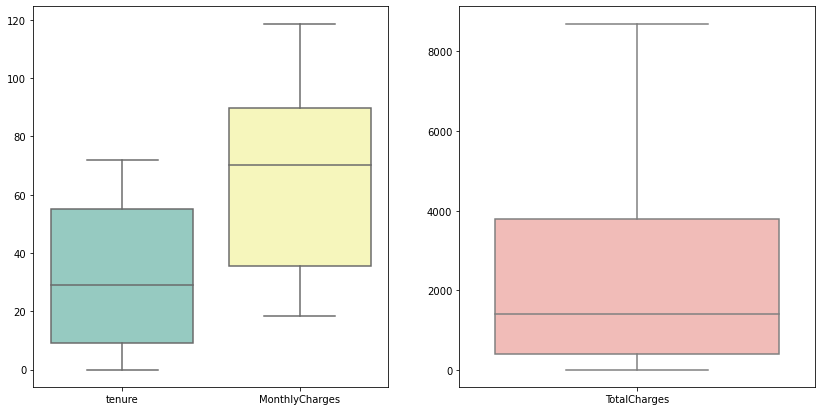

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.boxplot(ax=ax[0], data= data[["tenure", "MonthlyCharges"]], palette="Set3")
sns.boxplot(ax=ax[1], data= data[["TotalCharges"]], palette="Pastel1")
plt.show()

Podemos observar la inexistencia de outliers, por lo que no será necesario tomar medidas al respecto.

### Identificación e imputación de valores faltantes

In [11]:
# Observamos cuantos valores faltantes hay en nuestro conjunto de datos
data.isnull().sum().sum()

4824

In [12]:
# Observamos cuantos valores faltantes hay en cada variable
data.isnull().sum()

gender               93
SeniorCitizen       152
Partner             245
Dependents          263
tenure              220
PhoneService        317
MultipleLines       402
InternetService     312
OnlineSecurity      351
OnlineBackup        370
DeviceProtection    231
TechSupport         399
StreamingTV         413
StreamingMovies     470
Contract            165
PaperlessBilling    307
PaymentMethod       103
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [13]:
# Y observamos el porcentaje de valores faltantes respecto del total de datos
print(round(data.isnull().sum().sum() / (data.shape[0] * (data.shape[1]-1)) * 100, 2) , "%")

3.6 %


Los resultados nos arrojan un total de 4824 valores nulos de los 133817 que cuenta el conjunto de datos, estos valores nulos suponen un 3,6% del total de datos. Obtenida esta informacion, procederemos a imputarlos mediante el uso de algoritmos de regresión, técnica conocida con el nombre de imputación simple e imputación iterativa.

Para ello empezaremos a dividir nuestro conjunto de datos en tres grupos, el primero de variables numéricas, el segundo de variables categóricas y el último de la variable de salida, ya que las técnicas de imputacion para los dos primeros conjuntos seran distintas, y el tercer conjunto lo excluimos de la imputación puesto que nuestra variable de salida no puede influir en este proceso.

In [14]:
numericas = data.iloc[:, [4,17,18]]
categoricas = data.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]]
salida = data.iloc[:, -1]

Extraeremos los nombres tanto de nuestras variables categóricas como numéricas, ya que en el proceso de imputación estos nombres seran eliminados.

In [15]:
col_numericas = numericas.columns.values
col_categoricas = categoricas.columns.values

Empezaremos imputando nuestras variables categóricas mediante un imputador simple utilizando la técnica de reemplazar por el mas frecuente, es decir, la moda.

In [16]:
imputer_categorico = SimpleImputer(strategy='most_frequent')
imputer_categorico.fit(categoricas)
categoricas = imputer_categorico.transform(categoricas)

Y ahora le regresaremos el formato original en el que se encontraba en nuestro conjunto de datos

In [17]:
categoricas = pd.DataFrame(categoricas)
categoricas.columns = col_categoricas

Proseguiremos imputando nuestras variables numéricas mediante un imputador iterativo, utilizando el algoritmo de los bosques aleatorios de regresión para estimar los valores faltantes en base a los valores no faltantes de las demás variables. Cabe mencionar que no es necesario escalar nuestros datos numéricos cuando utilizamos un algoritmo Random Forest.

In [18]:
imputer_numerico = IterativeImputer(estimator=RandomForestRegressor())
imputer_numerico.fit(numericas)
numericas = imputer_numerico.transform(numericas)

Como hicimos con el conjunto anterior, le regresamos el formato original

In [19]:
numericas = pd.DataFrame(numericas)
numericas.columns = col_numericas

Y redondeamos los decimales para tener el mismo formato númerico de los datos originiales

In [20]:
numericas["tenure"] = numericas["tenure"].round()

Transformamos también la variable de salida a su formato original

In [21]:
salida = pd.DataFrame(salida)

Por último, unimos los tres conjuntos de datos para tener un solo DataFrame como al inicio de la sección

In [22]:
data = pd.concat([categoricas, numericas, salida], axis=1)

##### Comprobamos nuevamente si existen valores faltantes

In [23]:
data.isnull().sum().sum()

0

In [24]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Y ahora observamos que los métodos utilizados imputaron de forma satisfactoria los valores faltantes.

---

## 5. Análisis y visualización de datos

En base a las variables que tenemos disponible empezaremos la sección formulando algunas hipótesis que seran respondidas mediante el proceso de análisis de los datos.


* H1: ¿El género del cliente propicia la deserción de los servicios de la empresa?
* H2: ¿Son los clientes de la tercera edad mas propensos a desertar?
* H3: ¿Los clientes sin pareja son mas propensos a permanecer en la empresa?
* H4: ¿Si el cliente no vive con personas dependientes tiene mas probabilidades de abandonar la empresa?
* H5: ¿Es más probable que los clientes que no tienen servicio telefónico abandonen la empresa?
* H6: ¿Los clientes con múltiples lineas telefónicas son más propensos a permanecer en la empresa?
* H7: ¿Es más probable que los clientes abandonen la empresa si no tienen conexión a internet?
* H8: ¿Los clientes sin servicio de seguridad en línea tienden a abandonar la empresa?
* H9: ¿Los clientes sin servicio de copia de seguridad en línea tienden a abandonar la empresa?
* H10: ¿Los clientes sin servicio de protección de dispositivos tienden a abandonar la empresa?
* H11: ¿Los clientes sin servicio de soporte técnico tienden a abandonar la empresa?
* H12: ¿Los clientes sin servicio de transmisión televisiva tienden a abandonar la empresa?
* H13: ¿Los clientes sin servicio de transmisión de películas tienden a abandonar la empresa?
* H14: ¿Los clientes con mayor cantidad de meses en la empresa son más propensos a seguir permaneciendo en ella?
* H15: ¿Los clientes con poca cantidad de dinero mensual a pagar son más propensos a permanecer en la empresa?
* H16: ¿Los clientes con poca cantidad de dinero total a pagar son más propensos a permanecer en la empresa?
* H17: ¿El el tipo de contrato elegido por el cliente un factor que indique su deserción de la empresa?
* H18: ¿Los clientes que eligen facturación electrónica son más propensos a abandonar la empresa?
* H19: ¿Existe algún método de pago en particular preferido por los clientes desertores?


Para comenzar, visualizaremos la distribución de los datos respecto a cada uno de los tres conjuntos de
variables que se han identificado: Variables de información del cliente - Variables de servicio - Variables de contrato. Esta segmentación nos permitirá realizar un análisis mas ordenado e identificar patrones e información util para entender nuestros datos.

### Variables de información del cliente

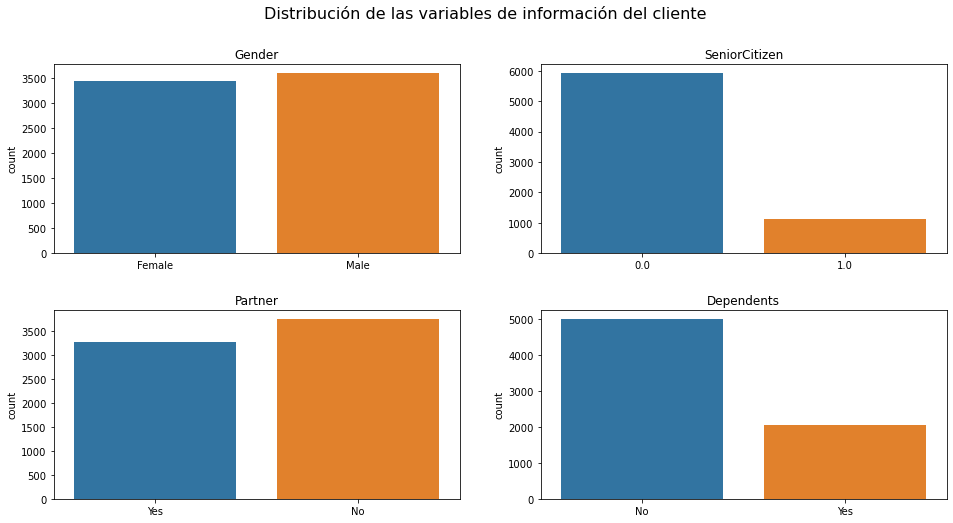

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
sns.countplot(data=data, x="gender", ax=ax[0,0])
ax[0,0].set_title("Gender")
ax[0,0].set_xlabel("")
sns.countplot(data=data, x="SeniorCitizen", ax=ax[0,1])
ax[0,1].set_title("SeniorCitizen")
ax[0,1].set_xlabel("")
sns.countplot(data=data, x="Partner", ax=ax[1,0])
ax[1,0].set_title("Partner")
ax[1,0].set_xlabel("")
sns.countplot(data=data, x="Dependents", ax=ax[1,1])
ax[1,1].set_title("Dependents")
ax[1,1].set_xlabel("")
fig.suptitle('Distribución de las variables de información del cliente', fontsize=16)
plt.show()

Observamos que tenemos una distribución equitativa en nuestras variables "gender" y "Partner", lo cual nos indica que ningún género predomina sobre el otro en la empresa, a la vez que hay tantas personas con pareja como sin pareja.

Por otro lado observamos que predominan más las personas menores de 65 años, y que la mayoría de ellos no viven con personas dependientes.

### Variables de servicio

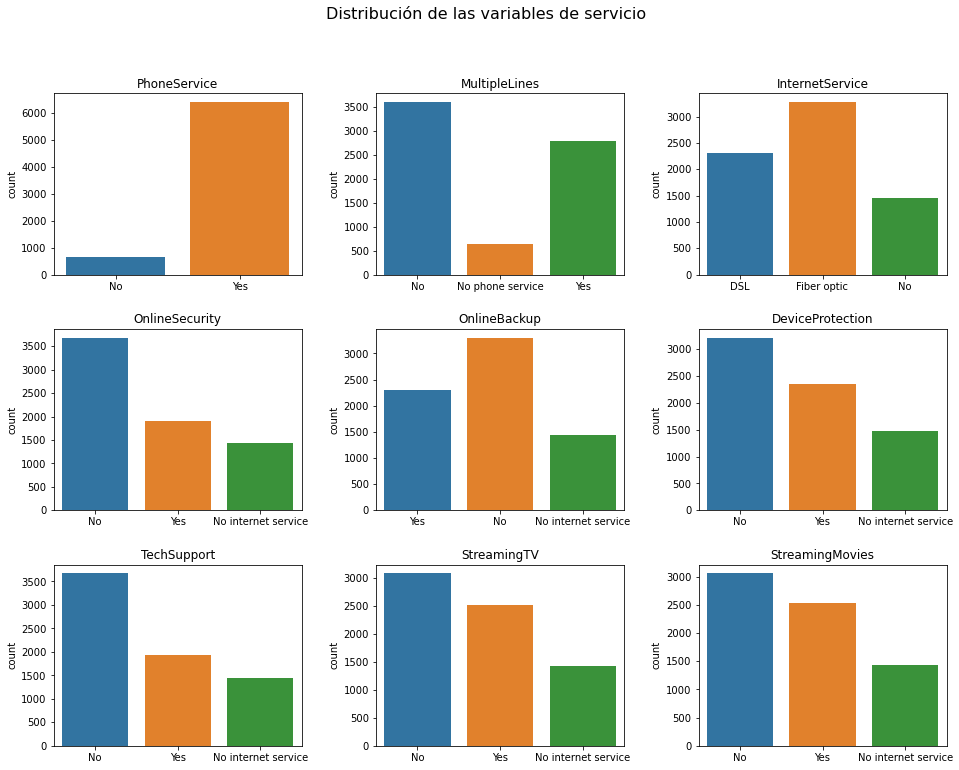

In [26]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.countplot(data=data, x="PhoneService", ax=ax[0,0])
ax[0,0].set_title("PhoneService")
ax[0,0].set_xlabel("")
sns.countplot(data=data, x="MultipleLines", ax=ax[0,1])
ax[0,1].set_title("MultipleLines")
ax[0,1].set_xlabel("")
sns.countplot(data=data, x="InternetService", ax=ax[0,2])
ax[0,2].set_title("InternetService")
ax[0,2].set_xlabel("")
sns.countplot(data=data, x="OnlineSecurity", ax=ax[1,0])
ax[1,0].set_title("OnlineSecurity")
ax[1,0].set_xlabel("")
sns.countplot(data=data, x="OnlineBackup", ax=ax[1,1])
ax[1,1].set_title("OnlineBackup")
ax[1,1].set_xlabel("")
sns.countplot(data=data, x="DeviceProtection", ax=ax[1,2])
ax[1,2].set_title("DeviceProtection")
ax[1,2].set_xlabel("")
sns.countplot(data=data, x="TechSupport", ax=ax[2,0])
ax[2,0].set_title("TechSupport")
ax[2,0].set_xlabel("")
sns.countplot(data=data, x="StreamingTV", ax=ax[2,1])
ax[2,1].set_title("StreamingTV")
ax[2,1].set_xlabel("")
sns.countplot(data=data, x="StreamingMovies", ax=ax[2,2])
ax[2,2].set_title("StreamingMovies")
ax[2,2].set_xlabel("")
fig.suptitle('Distribución de las variables de servicio', fontsize=16)
plt.show()

De los resultados obtenimos podemos indicar lo siguiente:

* Existe una inmensa mayoría de clientes que han adquirido los servicios de telefonía de la empresa, lo cual nos indica que es el servicio más demandado y básico que ofrece la compañía.

* Hay una distribución relativamente equitativa entre el número de clientes que tiene múltiples líneas y no, lo cual es común puesto que es un servicio opcional.

* La mayoria de los usuarios prefiere una conexión de fibra óptica como servicio de internet, ya que esta es mucho más rápida y de calidad que otros tipos de conexión convencionales.

* Observamos una tendencia de los usuarios a no contar con los servicios de seguridad que ofrece la empresa, podemos suponer múltiples razones, desde una mala calidad en estos servicios hasta costos elevados en la mensualidad por adquirirlos.

* Por último, observamos que existe una ligera diferencia entre la cantidad de clientes que eligen adquirir servicios de transmisión de TV a través de su servicio de internet y los que no lo hacen.

### Variables de contrato

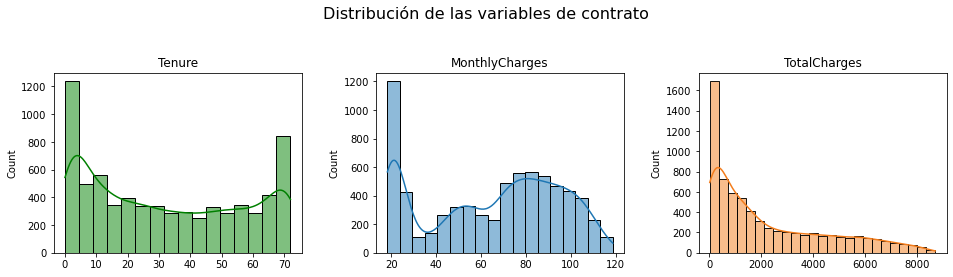

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
plt.subplots_adjust(wspace=0.3, top=0.75)
sns.histplot(data=data, x="tenure", kde=True, ax=ax[0], color="g")
ax[0].set_title("Tenure")
ax[0].set_xlabel("")
sns.histplot(data=data, x="MonthlyCharges", kde=True, ax=ax[1])
ax[1].set_title("MonthlyCharges")
ax[1].set_xlabel("")
sns.histplot(data=data, x="TotalCharges", kde=True, ax=ax[2], color="#F37C1B")
ax[2].set_title("TotalCharges")
ax[2].set_xlabel("")
fig.suptitle('Distribución de las variables de contrato', fontsize=16)
plt.show()

De estos resultados se extrae la siguiente información:

* Existen dos grandes picos en la distribución que muestra la cantidad de meses que el cliente a permanecido en la empresa al finalizar el trimestre, siendo estos los que han permanecido en un rango menor a 5 meses, y los que han permanecido en un rango mayor a 65 meses, lo que significa que la empresa cuenta con tantos clientes fieles como nuevos en la adquisición de sus servicios.

* Por otra parte, observamos que la variable de los cargos mensuales "MonthlyCharges" presenta 3 picos notables, siendo el mayor de estos los que tienen cargos mensuales alrededor de 20 dólares, seguido de otro con alrededor de 80 dólares, y por ultimo, uno con alrededor de 50 dólares. Esto quiere decir que tenemos una cantidad considerable de clientes que prefieren los contratos con poca mensualidad a pagar (los cuales probablemente incluyan menos servicios). 

* La variable de los cargos totales "TotalCharges" presenta una distribución de cola en donde el único pico que presenta es en los cargos con poca cantidad de dólares a pagar por los clientes, lo cual guarda relación con los anteriores gráficos donde vimos que existe una gran cantidad de clientes con pocos meses en la empresa y con cargos mensuales bajos.

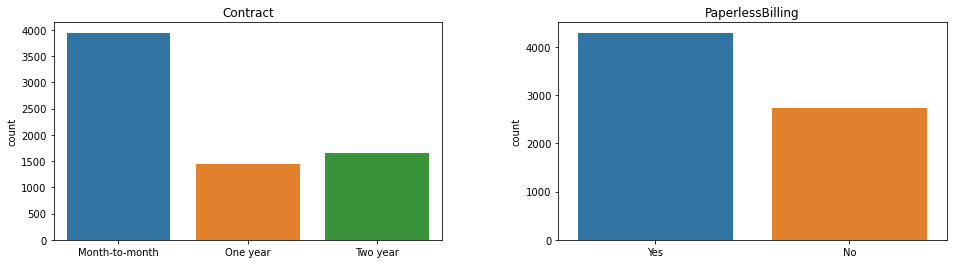

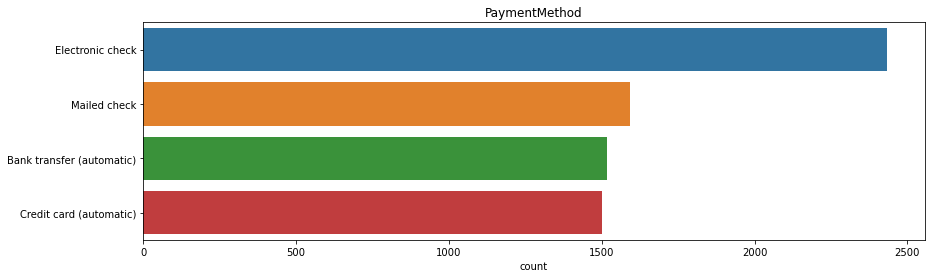

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plt.subplots_adjust(wspace=0.3)
sns.countplot(data=data, x="Contract", ax=ax[0])
ax[0].set_title("Contract")
ax[0].set_xlabel("")
sns.countplot(data=data, x="PaperlessBilling", ax=ax[1])
ax[1].set_title("PaperlessBilling")
ax[1].set_xlabel("")
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
sns.countplot(data=data, y="PaymentMethod")
ax.set_title("PaymentMethod")
ax.set_ylabel("")
plt.show()

* Observamos que el contrato preferido por los clientes es el de "Month to month", el cual es el más corto de todos, lo cual guarda cierta relación con el gráfico anterior donde vimos que había una gran cantidad de clientes con pocos meses de permanencia en la empresa.

* Por otra parte, observamos que los usuarios de la empresa mayormente prefieren facturación electronica.

* Por ultimo, observamos que la mayoría de clientes prefiere el método de pago con cheque electrónico, la distribución de los demas metodos se mantiene de forma equitativa entre ellos.

Una vez conocida la distribución de las variables con las que vamos a trabajar, procederemos a responder las hipótesis que inicialmente habíamos planteado, esto lo lograremos mediante un análisis bivariado de nuestras variables de entrada con nuestra variable de salida.

### Variables de información del cliente vs Churn

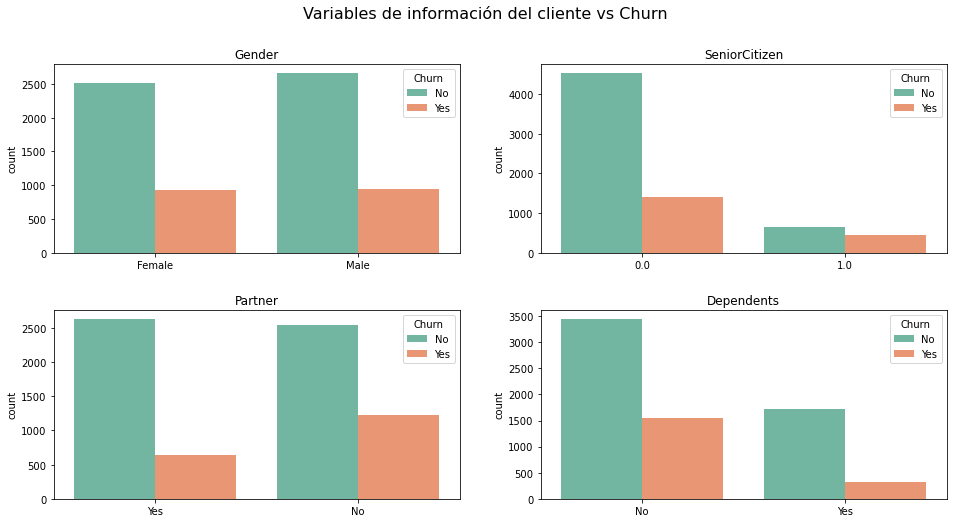

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plt.subplots_adjust(hspace=0.3)
sns.countplot(data=data, x="gender", ax=ax[0,0], hue=data.Churn, palette="Set2")
ax[0,0].set_title("Gender")
ax[0,0].set_xlabel("")
sns.countplot(data=data, x="SeniorCitizen", ax=ax[0,1], hue=data.Churn, palette="Set2")
ax[0,1].set_title("SeniorCitizen")
ax[0,1].set_xlabel("")
sns.countplot(data=data, x="Partner", ax=ax[1,0], hue=data.Churn, palette="Set2")
ax[1,0].set_title("Partner")
ax[1,0].set_xlabel("")
sns.countplot(data=data, x="Dependents", ax=ax[1,1], hue=data.Churn, palette="Set2")
ax[1,1].set_title("Dependents")
ax[1,1].set_xlabel("")
fig.suptitle('Variables de información del cliente vs Churn', fontsize=16)
plt.show()

* Observamos que tanto el número de desertores en el género masculino es el mismo que en el género femenino, por lo tanto se puede decir que esta variable no influye en la deserción de clientes de la empresa

* Sin embargo, en el gráfico de la variable "SeniorCitizen", observamos que los clientes que no son de la tercera edad (mayor a 65 años) son menos propensas a abandonar los servicios de la empresa, en comparación con las personas que si cumplen con esta franja de edad, las cuales tienen una distribución mas equilibrada. Por lo tanto, se puede decir que esta variable influye en cierta medida a la deserción de clientes.

* Del gráfico de la variable "Partner" podemos deducir que los clientes que no tienen pareja son ligeramente más propensos a abandonar los servicios de la empresa.

* Y por último, de la gráfica de la variable "Dependents" podemos observar que los clientes que no viven con personas dependientes tienen más probabilidades de abandonar los servicios de la empresa, por ende, es una variable influyente en la deserción de usuarios.

Resumiendo toda la información obtenida tenemos que: Tanto hombres como mujeres tienen la misma probabilidad de deserción, si estas personas son mayores de 65 años, esta probabilidad aumenta. Y el hecho que no tengan pareja y que no vivan con personas dependientes aumenta en cierta formasus probabilidades de abandonar los servicios de la empresa.

Respondiendo a las hipótesis tenemos que:
* H1: El género del cliente no afecta de ninguna forma en la deserción de los servicios de la empresa.
* H2: Los clientes de la tercera edad son más propensos a ser desertores comparados con los que no pasan esta franja de edad
* H3: Los clientes sin pareja tienen ligeramente mas probabilidades de desertar que aquellos que sí tienen
* H4: Los clientes que no viven con personas dependientes tienen más probabilidades de abandonar la empresa


### Variables de servicio vs Churn

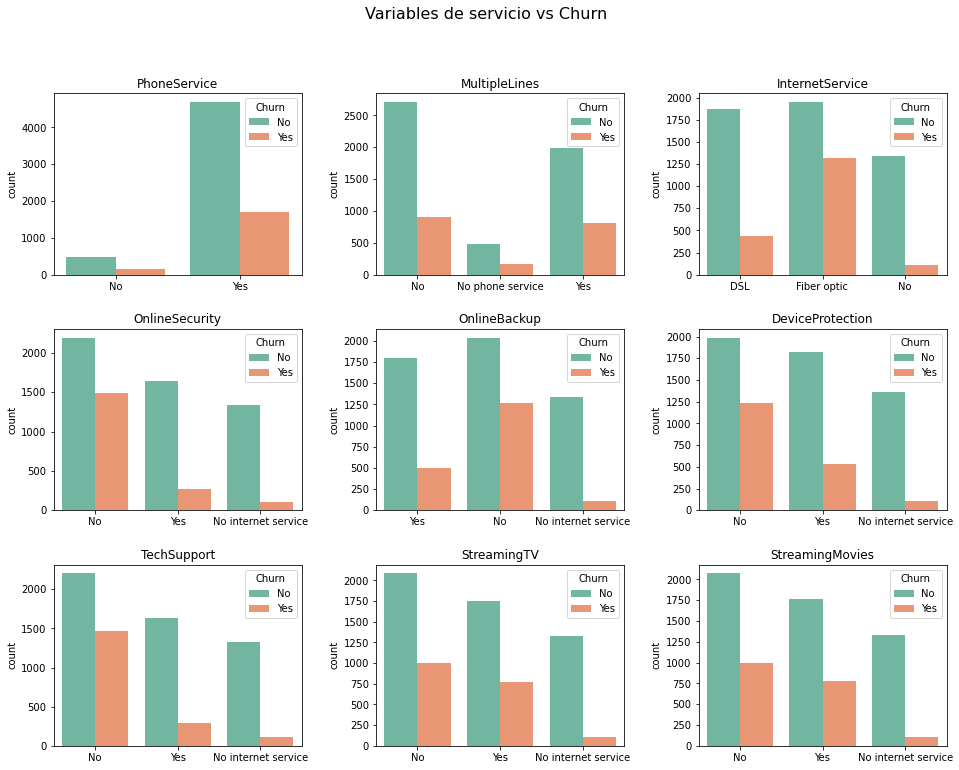

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.countplot(data=data, x="PhoneService", ax=ax[0,0], hue=data["Churn"], palette="Set2")
ax[0,0].set_title("PhoneService")
ax[0,0].set_xlabel("")
sns.countplot(data=data, x="MultipleLines", ax=ax[0,1], hue=data["Churn"], palette="Set2")
ax[0,1].set_title("MultipleLines")
ax[0,1].set_xlabel("")
sns.countplot(data=data, x="InternetService", ax=ax[0,2], hue=data["Churn"], palette="Set2")
ax[0,2].set_title("InternetService")
ax[0,2].set_xlabel("")
sns.countplot(data=data, x="OnlineSecurity", ax=ax[1,0], hue=data["Churn"], palette="Set2")
ax[1,0].set_title("OnlineSecurity")
ax[1,0].set_xlabel("")
sns.countplot(data=data, x="OnlineBackup", ax=ax[1,1], hue=data["Churn"], palette="Set2")
ax[1,1].set_title("OnlineBackup")
ax[1,1].set_xlabel("")
sns.countplot(data=data, x="DeviceProtection", ax=ax[1,2], hue=data["Churn"], palette="Set2")
ax[1,2].set_title("DeviceProtection")
ax[1,2].set_xlabel("")
sns.countplot(data=data, x="TechSupport", ax=ax[2,0], hue=data["Churn"], palette="Set2")
ax[2,0].set_title("TechSupport")
ax[2,0].set_xlabel("")
sns.countplot(data=data, x="StreamingTV", ax=ax[2,1], hue=data["Churn"], palette="Set2")
ax[2,1].set_title("StreamingTV")
ax[2,1].set_xlabel("")
sns.countplot(data=data, x="StreamingMovies", ax=ax[2,2], hue=data["Churn"], palette="Set2")
ax[2,2].set_title("StreamingMovies")
ax[2,2].set_xlabel("")
fig.suptitle('Variables de servicio vs Churn', fontsize=16)
plt.show()

* Para nuestra variable "PhoneService" no observamos relación alguna con la deserción de clientes, ya que ambas proporciones de abandonos en el caso de tener o no servicio telefónico se reparte de forma equitativa respecto al total de muestras.

* El mismo patrón se observa en la variable "MultipleLines", aunque es ligeramente más probable abandonar si el cliente cuenta con múltiples lineas de telefonía.

* En el caso de la variable "InternetService" observamos claramente que existe una alta probabilidad de desertar los servicios de la empresa si el usuario tiene un servicio de internet de fibra óptica.

* Lo mismo sucede en las variables "OnlineSecurity", "OnlineBackup", "DeviceProtection" y "TechSupport", donde es mucho más probable encontrar abandono de usuarios si estos no cuentan con los servicios mencionados, el cual es un comportamiento interesante ya que todos estos servicios están asociados a la seguridad y protección de red y dispositivos, y dependen únicamente si el cliente cuenta con servicio de internet o no.

* Por último, de las gráficas respecto a las variables "StreamingTV" y "StreamingMovies" tenemos una probabilidad similar de desertar si el usuario cuenta o no con estos servicios, y si no tiene servicio de internet, esta probabilidad desciende en gran medida

Resumiendo toda la informacion obtenida tenemos que: Contar con servicio telefónico o no, no afecta en la deserción de clientes, sin embargo el contar con múltiples líneas telefónicas puede llegar a afectar ligeramente esta probabilidad. Si el usuario tiene servicio de internet de fibra óptica, las probabilidades de desertar aumentan exponencialmente, y si a esto lo sumamos no adquirir ninguno de los servicios de protección y seguridad como ("OnlineSecurity", "OnlineBackup", "DeviceProtection", y "TechSupport") esta probabilidad aumenta aun más, por ende podemos deducir que existe un problema grave en los servicios de fibra óptica y los servicios de seguridad que brinda la empresa. Por último, podemos decir que el cliente tiene igual probabilidad de desertar en el caso que adquiera o no adquiera servicios de transmisión televisiva o de películas, y si no tiene servicios de internet, esta probabilidad disminuye en gran medida.

Respondiendo a las hipótesis tenemos que:
* H5: El contar o no con servicio telefónico no influye en la deserción de clientes en la empresa
* H6: Los clientes con múltiples líneas telefónicas son ligeramente mas probables a desertar
* H7: Es muy probable que los clientes abandonen la empresa si estos cuentan con internet de fibra óptica
* H8: Los clientes sin servicio de seguridad en línea tienden a abandonar la empresa
* H9: Los clientes sin servicio de copia de seguridad en linea tienden a abandonar la empresa
* H10: Los clientes sin servicio de protección de dispositivos tienden a abandonar la empresa
* H11: Los clientes sin servicio de soporte técnico tienden a abandonar la empresa
* H12: Los clientes sin servicio de transmisión televisiva tienen similar probabilidad de desertar en comparación con los que si cuentan con este servicio
* H13: Los clientes sin servicio de transmisión de películas tienen similar probabilidad de desertar en comparacion con los que si cuentan con este servicio

### Variables de contrato vs Churn

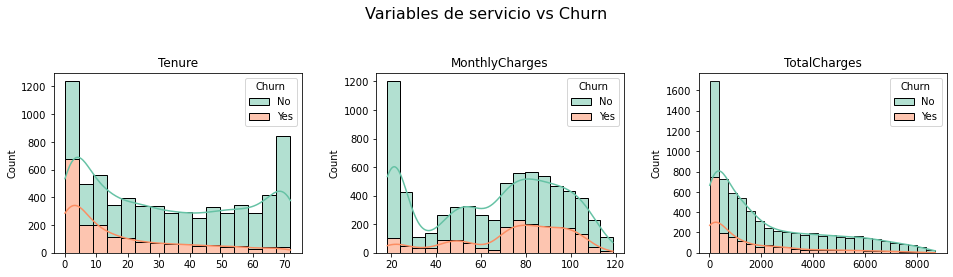

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
plt.subplots_adjust(wspace=0.3, top=0.75)
sns.histplot(data=data, x="tenure", kde=True, ax=ax[0], hue=data.Churn, multiple="stack", palette="Set2")
ax[0].set_title("Tenure")
ax[0].set_xlabel("")
sns.histplot(data=data, x="MonthlyCharges", kde=True, ax=ax[1], hue=data.Churn, multiple="stack", palette="Set2")
ax[1].set_title("MonthlyCharges")
ax[1].set_xlabel("")
sns.histplot(data=data, x="TotalCharges", kde=True, ax=ax[2], hue=data.Churn, multiple="stack", palette="Set2")
ax[2].set_title("TotalCharges")
ax[2].set_xlabel("")
fig.suptitle('Variables de servicio vs Churn', fontsize=16)
plt.show()

* En primer lugar observamos que existe una relación entre nuestra variable "tenure" (número de meses que el cliente permaneció en la empresa) con la deserción del cliente, ya que el histograma deja en clara evidencia que los usuarios que menos meses permanecieron se dividen de forma equitativa en usuarios desertores y no desertores, y que mientras más meses permanezcan en la empresa, menos probabilidades tendran de desertar y más probabilidades tendran de quedarse.

* En el caso de la variable "MonthlyCharges", podemos observar que un aumento del costo mensual a pagar por el cliente provocará un leve aumento en las probabilidades de desertar, a la vez que también observamos que los clientes con poca cantidad mensual a pagar son los que indudablemente permanecen en la empresa.

* Por último, para el caso de "TotalCharges", tenemos un comportamiento similar entre los clientes que desertaron y no desertaron, ya que podemos observar que si el monto total a pagar es pequeño, las probabilidades de desertar o quedarse son similares, por otra parte, mientras mayor sea este monto, menor sera la probabilidad de abandonar (para los clientes que desertaron) y no abandonar (para los clientes que no desertaron) los servicios de la empresa

Resumiendo toda la información obtenedia tenemos que: Existe una distribución equitativa entre los clientes que desertaron y no desertaron cuando estos tienen pocos meses afiliados a la empresa, y que mientras mayor sea la cantidad de meses que permanecen en esta, mayor será su probabilidad de quedarse, a la vez que tambien observamos una leve relación entre el aumento de la mensualidad a pagar de los clientes y el abandono de estos, ya que mientras mayor sea el monto, mayores probabilidades hay de desertar. Por último tenemos que en los montos totales con menor valor monetario hay una probabilidad casi equitativa de desertar o no de los servicios de la empresa, y que esto se relaciona con los meses de permanencia en la empresa("tenure"), ya que si un cliente pasa menos tiempo afiliado a la empresa, es de esperarse que su monto total a pagar sea igual de bajo como el tiempo que paso afiliado.

Respondiendo a las hipótesis tenemos que:
* H14: Los clientes con mayor número de meses en la empresa tienden a permancer más tiempo en ella
* H15: Los clientes con poca cantidad de dinero mensual a pagar son más propensos a permanecer en la empresa
* H16: Los clientes con poca cantidad de dinero total a pagar son igualmente propensos a abandonar como permanecer en la empresa


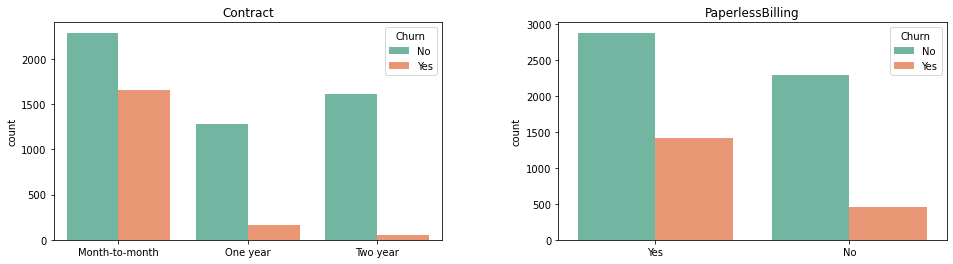

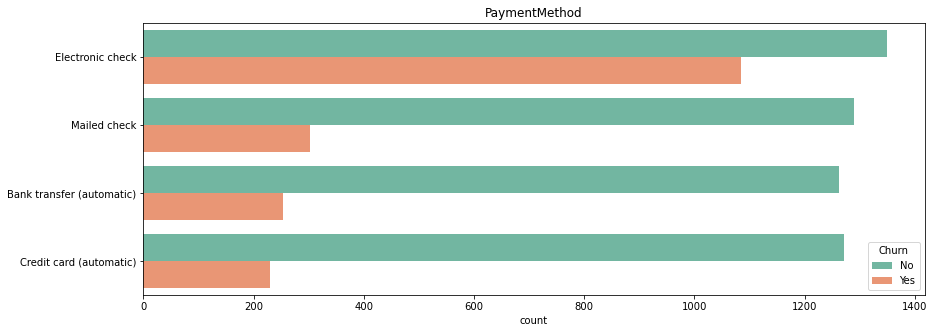

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plt.subplots_adjust(wspace=0.3)
sns.countplot(data=data, x="Contract", ax=ax[0], hue=data.Churn, palette="Set2")
ax[0].set_title("Contract")
ax[0].set_xlabel("")
sns.countplot(data=data, x="PaperlessBilling", ax=ax[1], hue=data.Churn, palette="Set2")
ax[1].set_title("PaperlessBilling")
ax[1].set_xlabel("")
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
sns.countplot(data=data, y="PaymentMethod", hue=data.Churn, palette="Set2")
ax.set_title("PaymentMethod")
ax.set_ylabel("")
plt.show()

* Se puede observar que las probabilidades de deserción de un cliente aumentan en gran medida si este tiene un contrato corto de mes a mes, y que los clientes desertores rara vez escogen contratos largos como los de un año o dos años.

* La facturacion electrónica es una variable que influye ligeramente en la deserción de los clientes ya que podemos ver que los usuarios que escogen este tipo de documento tienen un mayor número de desertores comparado con los que no escogen esto.

* Por último, tenemos que los clientes que escogen el cheque electrónico como método de pago  son mas propensos a abandonar los servicios de la empresa, mientras que los clientes que escogen otros métodos como los automaticos o los enviados por correo electroncio tienden a no desertar

Resumiendo toda la información obtenedia tenemos que: Los contratos cortos son los preferidos de los usuarios que no estan seguros si los servicios que brinda la empresa cumpliran sus expectativas, y por ende, son los que mas probabilidad tienen de desertar, al igual que el documento y método de pago preferido por este tipo de clientes es el cheque electrónico y la facturación electrónica.

Respondiendo a las hipótesis tenemos que:
* H17: El tipo de contrato elegido ayuda a determinar si un cliente es propenso a desertar o no, ya que en la mayoría de ocaciones estos eligen contratos mes a mes.
* H18: Los clientes que eligen facturación electrónica son ligeramente mas propensos a abandonar la empresa
* H19: Los clientes desertores en la mayoría de ocaciones eligen el cheque electrónico como metodo de pago.


#### A lo largo de este proceso de análisis nos hemos encontrado con un patrón repetitivo en los clientes desertores, el cual consiste en no tener los servicios basados en la seguridad de red y dispositivos, y que estos en su gran mayoría provenian de usuarios con servicio de internet y especificamente con conexión de fibra óptica, es por ello que nos proponemos a identificar la combinación de servicios que mayor abandono y mayor permanencia de clientes tienen para poder observar que cantidad de servicios adquiridos y que tipo de servicios en particular son los que propician la deserción y la permanencia de cliente en la empresa.

### ¿Que combinación de servicios propicia el abandono de clientes?

In [33]:
# Creamos un nuevo conjunto de datos en la que codificaremos numéricamente la variable "Churn" para poder construir una tabla de
# pivotaje que cuente los valores positivos de esta variable
churn_dummy = pd.get_dummies(data, columns=["Churn"])

In [34]:
# Identificamos que combinación de servicios tiene más deserción en base a la variable que mas presencia tiene: "PhoneService"
mayor_aban = pd.pivot_table(churn_dummy,index=["PhoneService"], columns=["InternetService","MultipleLines","OnlineSecurity",
                                                                         "OnlineBackup","DeviceProtection","TechSupport",
                                                                         "StreamingTV","StreamingMovies"], values=["Churn_Yes"],
                                                                         aggfunc=lambda x: x.sum() if x.sum() > 70 else np.nan)
mayor_aban

Churn_Yes                 
InternetService        DSL Fiber optic     
MultipleLines           No          No  Yes
OnlineSecurity          No          No   No
OnlineBackup            No          No   No
DeviceProtection        No          No   No
TechSupport             No          No   No
StreamingTV             No          No   No
StreamingMovies         No          No   No
PhoneService                               
Yes                     73         157  105

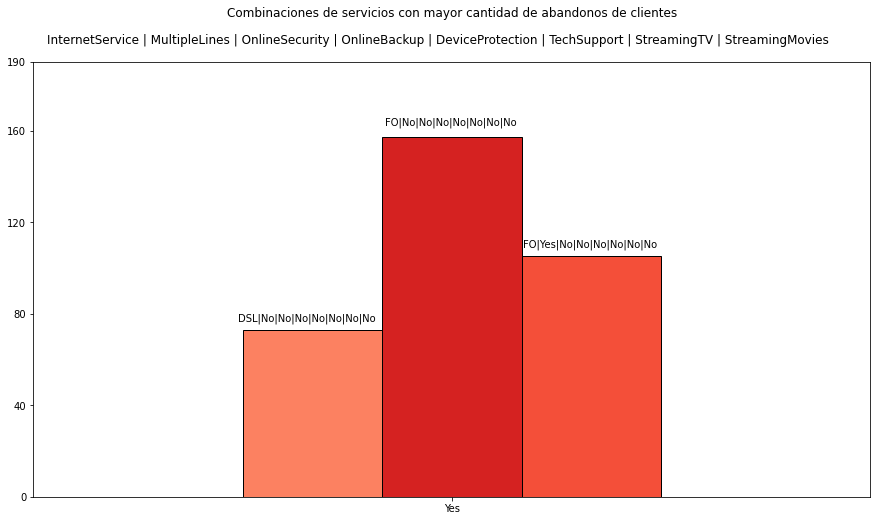

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
mayor_aban.plot(kind="bar", ax=ax, color=["#fc8161", "#d52221", "#f44f39"], edgecolor='black')
plt.title("Combinaciones de servicios con mayor cantidad de abandonos de clientes", y=1.09)
plt.suptitle("InternetService | MultipleLines | OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies", y=0.93)
plt.yticks([0,40,80,120,160,190])
plt.xticks(rotation=0)
plt.xlabel('')
plt.legend('',frameon=False)
plt.text(0.245, 0.41, 'DSL|No|No|No|No|No|No|No', verticalalignment='center', transform=ax.transAxes)
plt.text(0.42, 0.86, 'FO|No|No|No|No|No|No|No', verticalalignment='center', transform=ax.transAxes)
plt.text(0.585, 0.58, 'FO|Yes|No|No|No|No|No|No', verticalalignment='center', transform=ax.transAxes)
plt.show()

Del gráfico mostrado identificamos que las combinaciones que mas desersión tienen son las que incluyen menos servicios del catálogo que ofrece la empresa, estos clientes solo cuentan con servicio de telefonía e internet, sin embargo, no adquieren los servicios complementarios al de internet, como vendrian a ser "TechSupport", "DeviceProtection", "OnlineBackup" y "OnlineSecurity" como ya habiamos visto previamente en análisis anteriores, lo cual nos da a entender que si el cliente cuenta con servicios de conexión a internet pero no con sus complementarios, entonces hay una mayor probabilidad de que estos en un futuro deserten, puesto que los consideran importantes y que hay algún motivo que esta impidiendo que los adquieran, el cual podría ser el factor económico.


### ¿Que combinación de servicios propician la permanencia de clientes?

In [36]:
# Identificamos que combinación de servicios tiene mayor permanencia de los clientes en base a la variable que mas presencia
# tiene: "PhoneService"
mayor_perm = pd.pivot_table(churn_dummy,index=["PhoneService"], columns=["InternetService","MultipleLines","OnlineSecurity",
                                                                         "OnlineBackup","DeviceProtection","TechSupport",
                                                                         "StreamingTV","StreamingMovies"], values=["Churn_No"],
                                                                         aggfunc=lambda x: x.sum() if x.sum() > 112 else np.nan)
mayor_perm

Churn_No                    
InternetService                   No                    
MultipleLines                     No                 Yes
OnlineSecurity   No internet service No internet service
OnlineBackup     No internet service No internet service
DeviceProtection No internet service No internet service
TechSupport      No internet service No internet service
StreamingTV      No internet service No internet service
StreamingMovies  No internet service No internet service
PhoneService                                            
Yes                            778.0               206.0

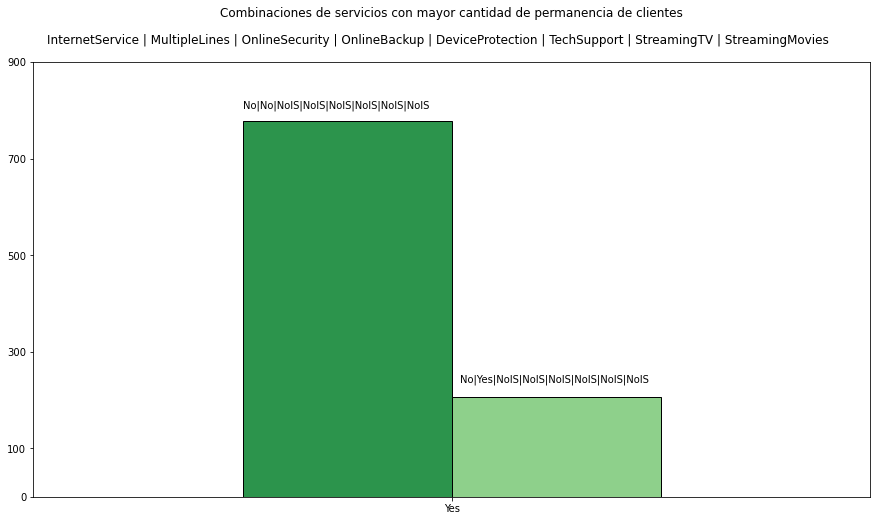

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))
mayor_perm.plot(kind="bar", ax=ax, color=["#2c944c", "#8ed08b"], edgecolor='black')
plt.title("Combinaciones de servicios con mayor cantidad de permanencia de clientes", y=1.09)
plt.suptitle("InternetService | MultipleLines | OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies", y=0.93)
plt.yticks([0,100,300,500,700,900])
plt.xticks(rotation=0)
plt.xlabel('')
plt.legend('',frameon=False)
plt.text(0.25, 0.9, 'No|No|NoIS|NoIS|NoIS|NoIS|NoIS|NoIS', verticalalignment='center', transform=ax.transAxes)
plt.text(0.51, 0.27, 'No|Yes|NoIS|NoIS|NoIS|NoIS|NoIS|NoIS', verticalalignment='center', transform=ax.transAxes)
plt.show()

De este gráfico observamos un patrón interesante, ya que los clientes que tienen mayor permanencia en la empresa son en su gran mayoría los que solo cuentan con servicio telefónico, estos clientes en comparación con la combinación que mayor propicia la deserción no cuentan con servicio de internet, por lo tanto no se ven afectados al no tener los servicios complementarios que derivan de este, lo que causa que sus probabilidades de desertar disminuyan y sean mas propensos a permanecer en la empresa.

Entonces podemos concluir que nuestra variable "InternetService" es un factor muy importante al momento de determinar si un cliente abandona o permanece con los servicios de la empresa, ya que condiciona el comportamiento de las demás variables de servicio y su adquisición sin los servicios complementarios que derivan de él propician la desercion de los usuarios. 


#### Para terminar con esta sección, graficaremos una matriz de correlación para identificar el comportamiento conjunto de nuestras variables sobre otras, como estamos tratando tanto con variables categóricas como numéricas, sera necesario primero codificar las variables categóricas para poder graficar de forma correcta la matriz de correlación.

### Matriz de correlación

In [38]:
data_corr = pd.get_dummies(data, columns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
                                            "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
                                            "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod",
                                            "Churn"], drop_first=True)

Debido a que contamos con muchas variables, será necesario dividir nuestro conjunto de datos y graficar la matriz de correlación en base a cada una de estas divisiones para poder apreciar mejor la gráfica.

In [39]:
data_corr_1 = data_corr[["tenure","MonthlyCharges","TotalCharges","gender_Male","SeniorCitizen_1.0",
                        "Partner_Yes","Dependents_Yes","PhoneService_Yes","MultipleLines_No phone service",
                        "MultipleLines_Yes","Churn_Yes"]]

data_corr_2 = data_corr.iloc[:,10:31]

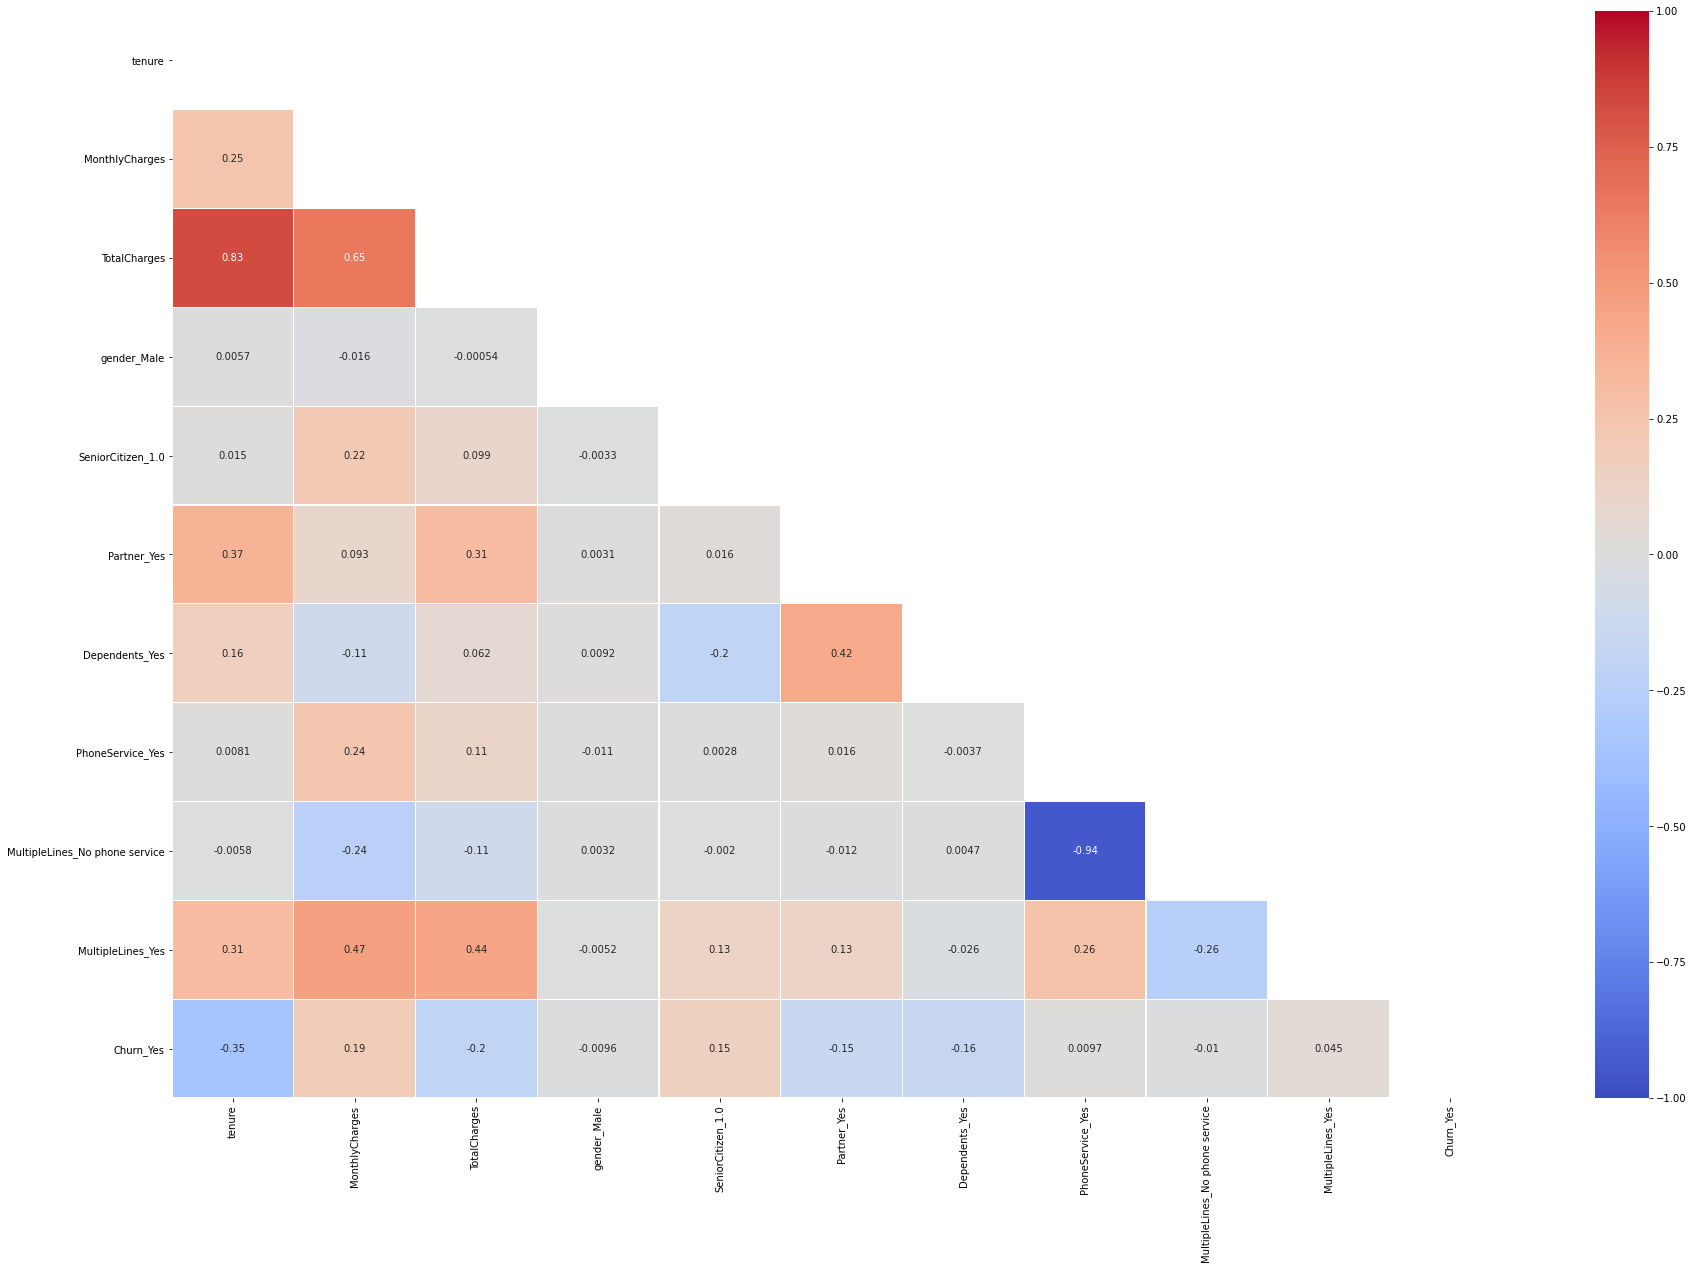

In [40]:
# Matriz de correlación para el primer conjunto
plt.figure(figsize=(30, 20))
corr = data_corr_1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2,
                 cmap='coolwarm', vmin=-1, vmax=1)

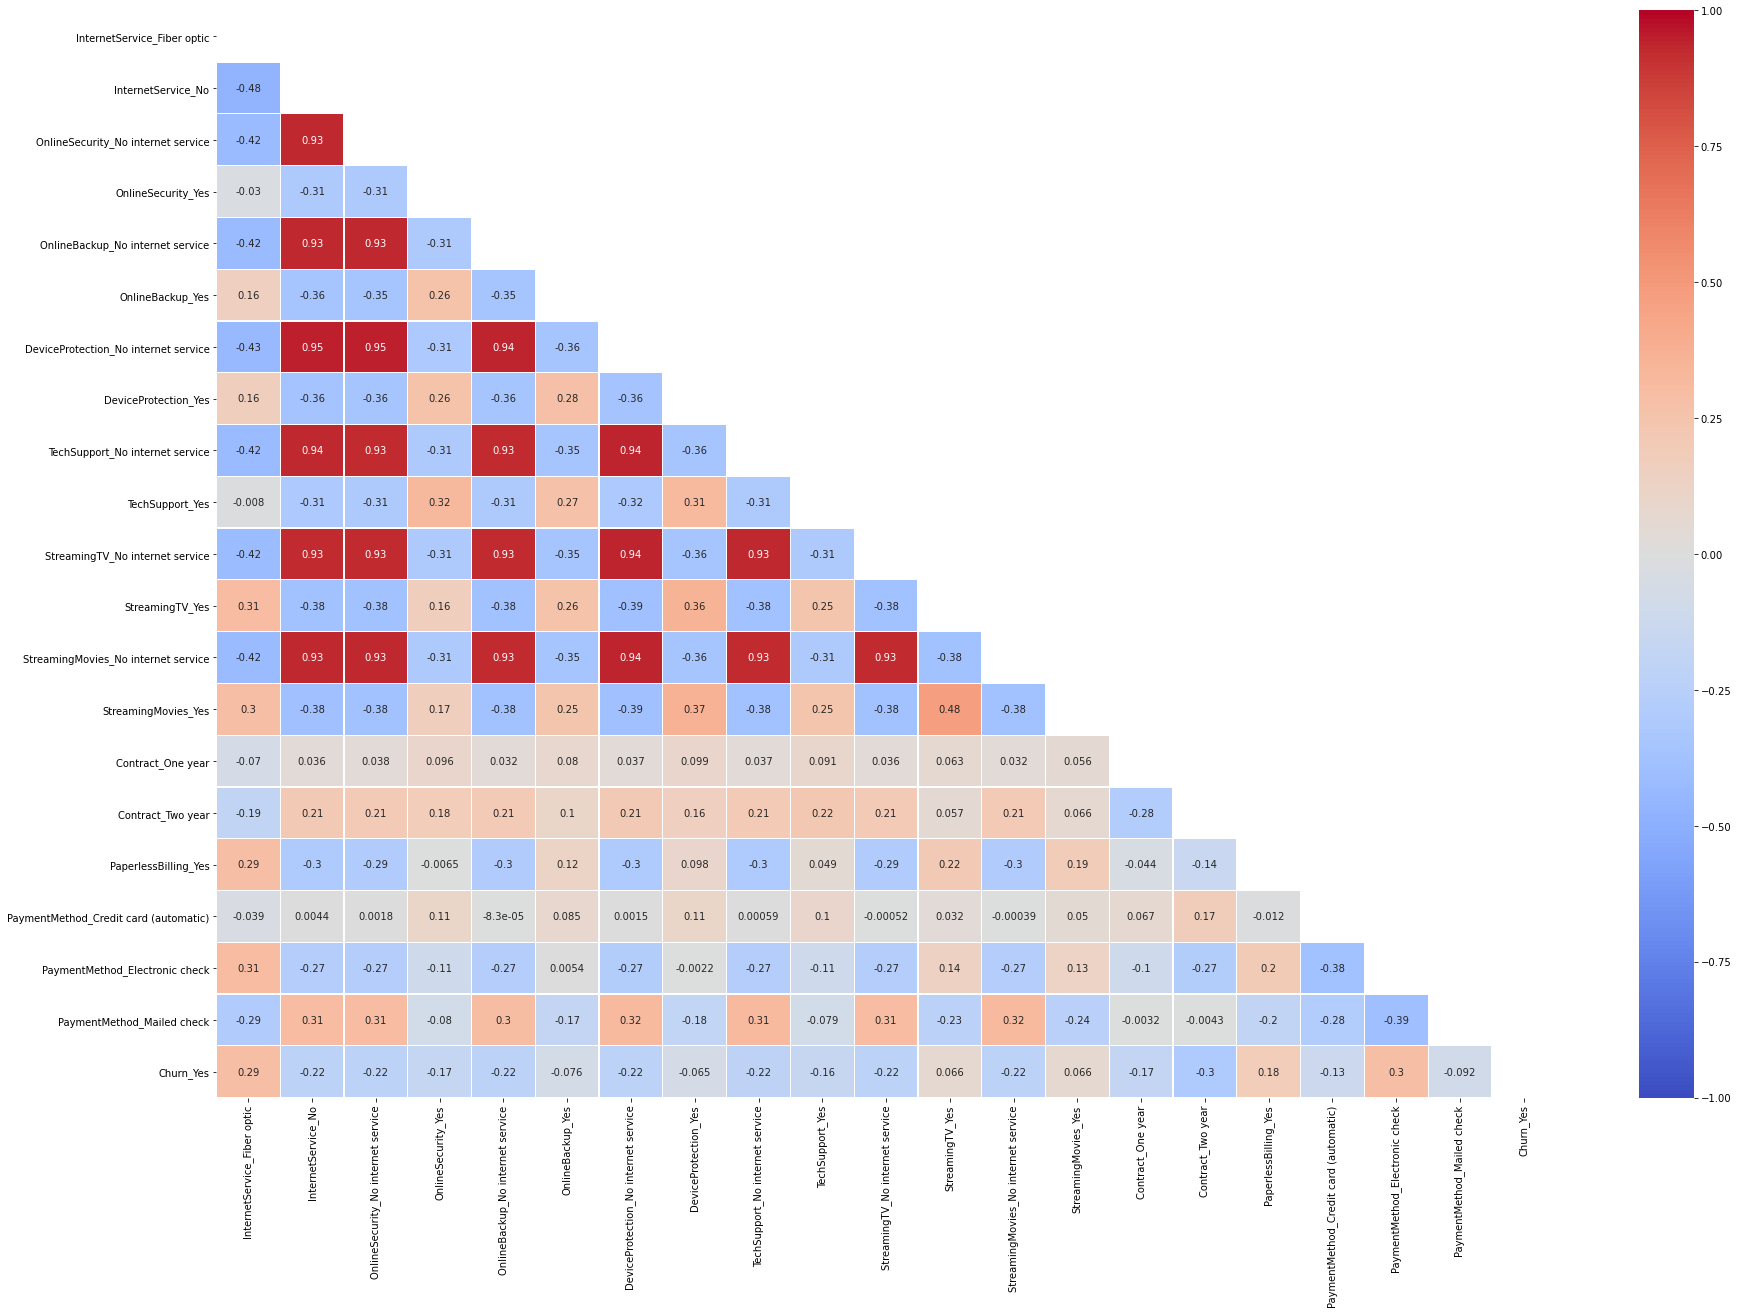

In [41]:
# Matriz de correlación para el segundo conjunto
plt.figure(figsize=(30, 20))
corr = data_corr_2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2,
                 cmap='coolwarm', vmin=-1, vmax=1)

Identificamos la existencia de una gran correlación entre las variables que estan asociadas a los servicios que ofrece la empresa, siendo las mas influyentes y recurrentes aquellas relacionadas con "InternetService".

A continuacion, visualizaremos algunas de las correlaciones mas altas y bajas mediante un gráfico de barras, puesto que estamos tratando en su mayoría con variables categóricas y no numéricas.


### StreamingTV vs StreamingMovies

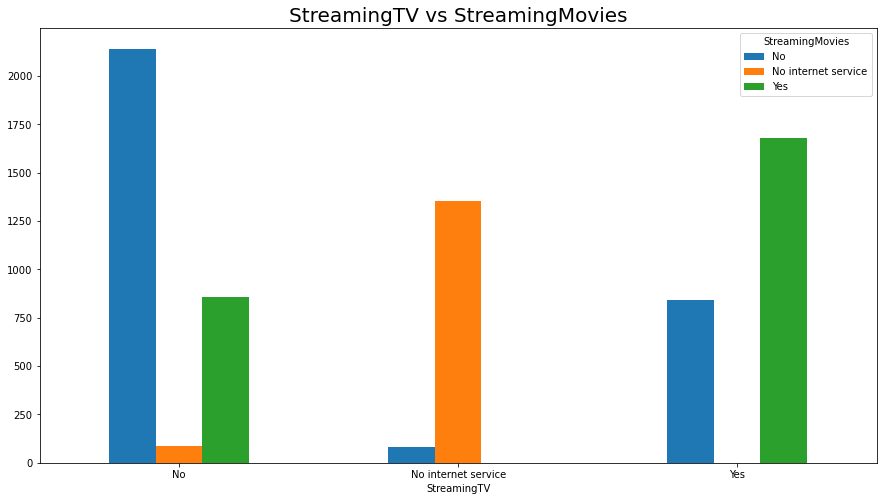

In [42]:
STV_SMOV=pd.crosstab(index=data['StreamingTV'],columns=data['StreamingMovies'])
STV_SMOV.plot.bar(figsize=(15,8), rot=0)
plt.title("StreamingTV vs StreamingMovies", fontsize=20)
plt.show()

Observamos que las variables "StreamingTV" y "StreamingMovies" estan correlacionadas positivamente, especialmente en la clase "No internet service" como nos muestra nuestra tabla de correlaciones, puesto que para cada clase de la variable "StreamingTV", la variable "StreamingMovies" se comportará en gran medida de la misma manera, es decir, si el cliente no cuenta con servicio de transmisión de TV, con mucha frecuencia tampoco contara con servicio de transmisión de películas, y este mismo patrón se repite en las demas clases. Este comportamiento se puede explicar de la siguiente forma: Si un usuario no esta interesado en usar su servicio de internet para adquirir servicios de transmisión televisiva, es muy probable que tampoco este interesado en adquirir servicios de transmisión de películas, puesto que sus gustos no se centran en este tipo de entretenimiento, el mismo comportamiento se aplica si el cliente si adquiere servicios televisivos, sin embargo, en el caso de no contar con servicio de internet, no existen alternativas que el cliente pueda elegir.


### DeviceProtection vs TechSupport

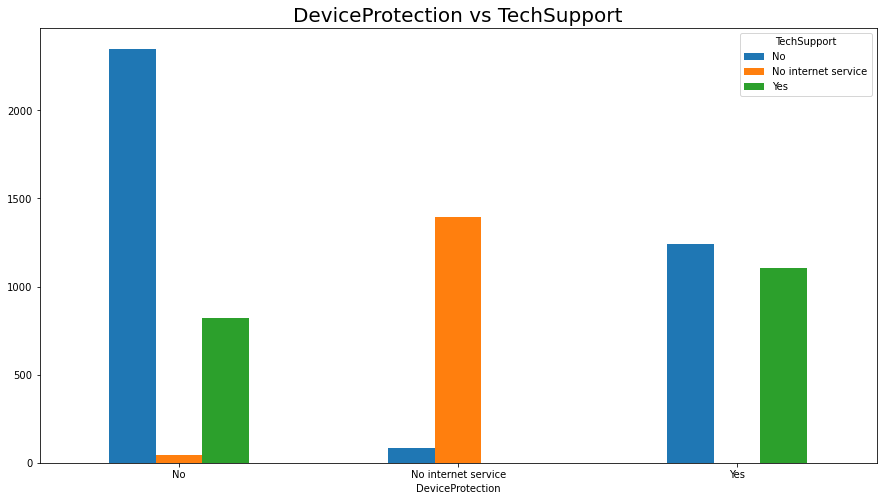

In [43]:
DP_TS=pd.crosstab(index=data['DeviceProtection'],columns=data['TechSupport'])
DP_TS.plot.bar(figsize=(15,8), rot=0)
plt.title("DeviceProtection vs TechSupport", fontsize=20)
plt.show()

Un patron similar observamos en estas variables, con la diferencia que la última clase de la variable "DeviceProtection" tiene una distribución mas balanceada, sin embargo, aun posee correlación con "TechSupport", ya que sigue influenciando en su comportamiento. La razon de este comportamiento sigue siendo el mismo que el del gráfico anterior.

### OnlineSecurity vs TechSupport

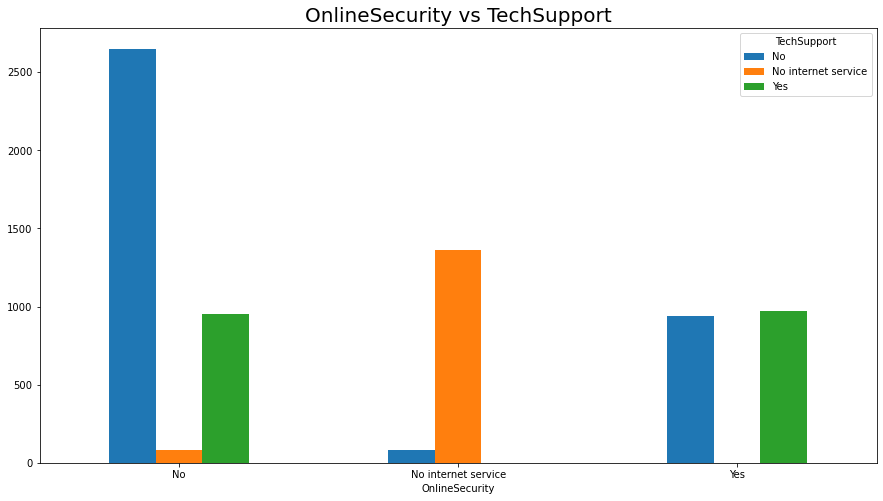

In [44]:
OS_TS=pd.crosstab(index=data['OnlineSecurity'],columns=data['TechSupport'])
OS_TS.plot.bar(figsize=(15,8), rot=0)
plt.title("OnlineSecurity vs TechSupport", fontsize=20)
plt.show()

Y lo mismo observamos al comparar "DeviceProtection" vs "TechSupport", en donde se aprecia correlación positiva e igual interpretacion de comportamiento.

### MultipleLines vs PhoneService

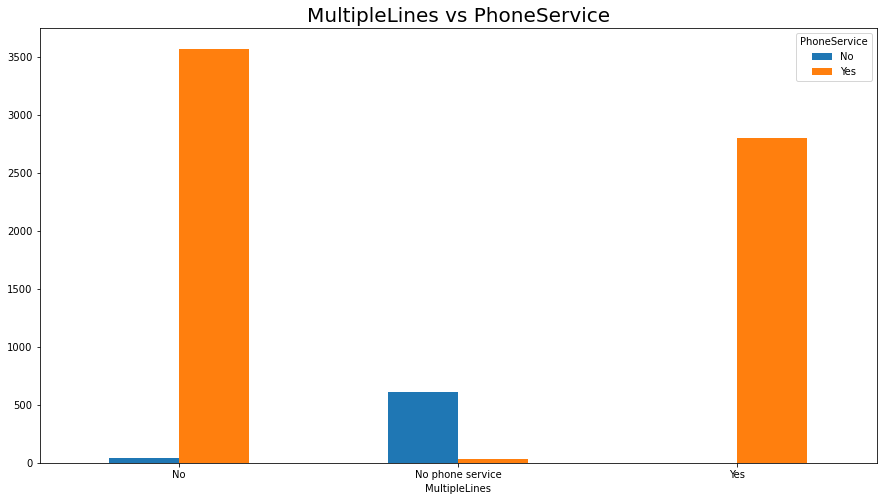

In [45]:
ML_PS=pd.crosstab(index=data['MultipleLines'],columns=data['PhoneService'])
ML_PS.plot.bar(figsize=(15,8), rot=0)
plt.title("MultipleLines vs PhoneService", fontsize=20)
plt.show()

Por último, observamos una correlación altamente negativa entre ambas variables, puesto que "MultipleLines" tiende a adquirir un valor de "No" cuando "PhoneService" adquiere un valor de "Yes", condicionando en forma inversa su valor.

---

## 6. Transformación de datos

Antes de empezar con la verificación e implementación de técnicas para la transformación de datos, empezaremos codificando nuestras variables categóricas a numéricas, puesto que es un paso necesario para que los algoritmos de aprendizaje automático (XGBoost en nuestro caso) puedan aprender correctamente de los datos.

In [46]:
data_cod = data.copy()
encoder = LabelEncoder()

In [47]:
data_cod["Churn"] = encoder.fit_transform(data_cod["Churn"])

data_cod = pd.get_dummies(data_cod, columns=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
                                             "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
                                             "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"],
                                             drop_first=True)

Posterior a ello, segmentaremos la totalidad de nuestros datos en dos conjuntos: variables de entrada (X) y variable de salida (y). Para después volver a dividir estos conjuntos en: datos de entrenamiento (X_train, y_train) y datos de validación (X_test, y_test). Esta división nos ayudara a evitar un problema conocido como "fuga de datos", el cual es causado al realizar transformaciones en la totalidad de los datos o incluir información en la fase de entrenamiento del modelo que no se esperaría que estuviese disponible al momento de realizar una predicción con datos no antes visto, lo cual provoca que no tengamos recursos al momento de querer validar nuestro modelo o que las métricas de evaluación arrojen falsos resultados.

In [48]:
# Conjunto de variables de entrada y salida
X = data_cod.drop(["Churn"], axis=1)
X = X.iloc[: , :].values
y = data_cod.iloc[: , 3].values

In [49]:
# Conjunto de entrenamiento y evaluación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21, stratify=y)

Una vez realizados todos estos pasos, estamos listos para empezar con la implementación de técnicas para la transformación de datos.

### Rebalanceo de datos

Empezaremos comprobando el número de muestras para cada una de las clases que tiene nuestra variable de salida para identificar si tenemos un conjunto de datos desbalanceado.

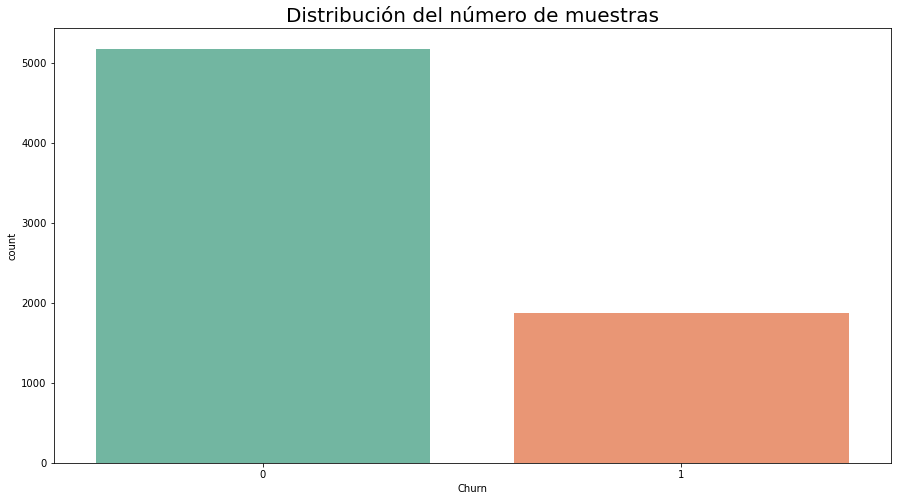

In [50]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data_cod, x="Churn", palette=["#66c2a5", "#fc8d62"])
plt.title("Distribución del número de muestras", fontsize=20)
plt.show()

In [51]:
counter_total = Counter(data_cod["Churn"])
print(counter_total)

Counter({0: 5174, 1: 1869})


Notamos que existe una diferencia notable en el número de datos clasificados a cada clase, en este caso, nuestra clase minoritaria vendria a ser "1" (clientes desertores), el cual es aproximandamente 3 veces menor a nuestra clase mayoritaria "0" (clientes no desertores).

Las consecuencias de tener datos desbalanceados se dan a relucir cuando el modelo de predicción que utilizemos tenga un rendimiento deficiente al momento de predecir datos catalogados con la clase minoritaria, y buenas predicciones hacia datos de la clase mayoritaria, puesto que estará sesgado hacia la clase que mayor presencia tiene en el conjunto de datos, lo cual no es el resultado que esperamos.

Existen diversas técnicas para solucionar este problema, como el sobremuestreo (creación de nuevas muestras sintéticas en la clase minoritaria para igualar la cantidad de muestras de la clase mayoritaria), submuestreo (reducción de la cantidad de muestras de la clase mayoritaria para igualar la cantidad de muestras de la clase minoritaria), modelos híbridos(aplica ambas técnicas mencionadas), entre otros. En este caso, debido a que en nuestro conjunto de datos tenemos variables categóricas y numéricas, haremos uso del sobremuestreo, siendo mas especificos, utilizaremos la técnica SMOTE-NC, la cual está basada en el algoritmo de aprendizaje automatico KNN, el cual utilizará la distancia euclidiana para generar nuevos datos que mayor se ajusten a la realidad a partir de los que ya tenemos.

Como anteriormente habíamos explicado, para evitar sufrir de fuga de datos implementaremos la técnica SMOTE-NC solo en nuestros conjuntos de entrenamiento, dejando intactos los de evaluación, ya que es recomendable que estos esten íntegros para obtener resultados confiables en las métricas que evalúen nuestro modelo.

#### Antes del rebalanceo

In [52]:
counter_antes = Counter(y_train)
print(counter_antes)
print("Número total de muestras: %i" % y_train.shape)

Counter({0: 3622, 1: 1308})
Número total de muestras: 4930


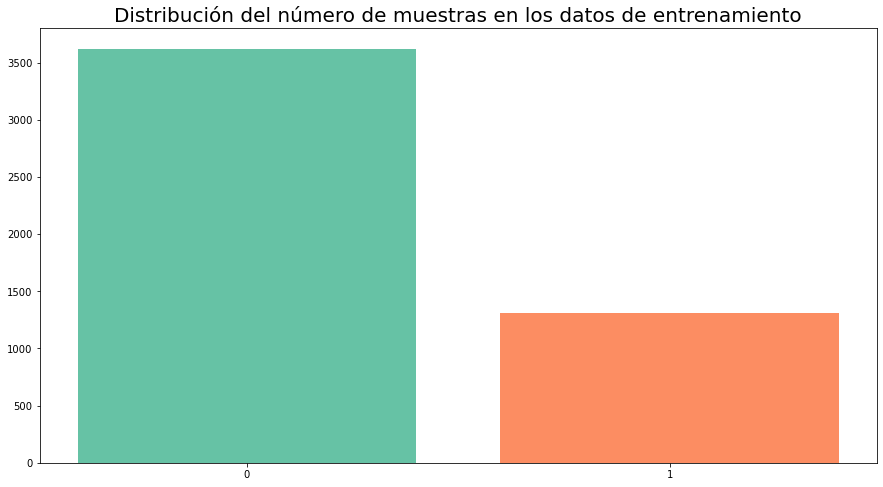

In [53]:
plt.figure(figsize=(15, 8))
plt.bar(counter_antes.keys(), counter_antes.values(), color=["#66c2a5", "#fc8d62"])
plt.title("Distribución del número de muestras en los datos de entrenamiento", fontsize=20)
plt.xticks([0, 1])
plt.show()

#### Después del rebalanceo

In [54]:
# Lista que almacenará la posición de nuestras variables categóricas en el conjunto de datos
categoricas = []  
for i in range(3,30):
    categoricas.append(i)

In [55]:
smnc = SMOTENC(categorical_features= categoricas, random_state=21)
X_train_bal, y_train_bal = smnc.fit_resample(X_train, y_train)

In [56]:
counter_despues = Counter(y_train_bal)
print(counter_despues)
print("Número total de muestras: %i" % y_train_bal.shape)

Counter({0: 3622, 1: 3622})
Número total de muestras: 7244


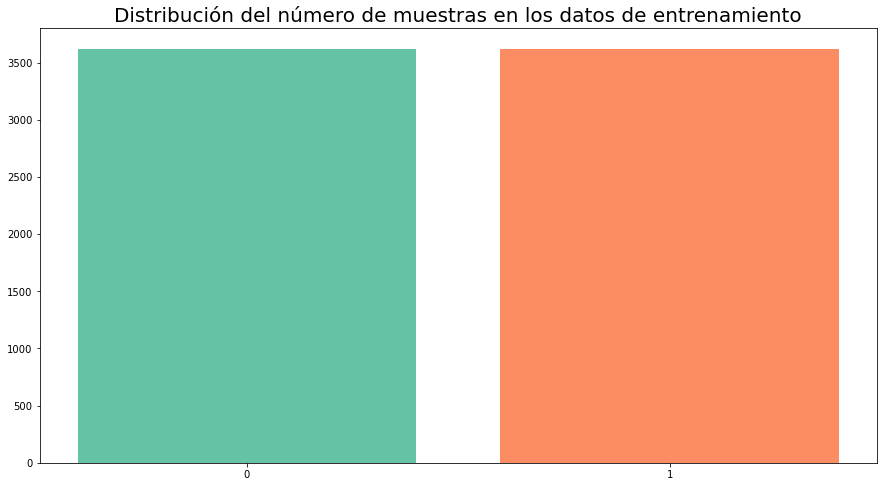

In [57]:
plt.figure(figsize=(15, 8))
plt.bar(counter_despues.keys(), counter_despues.values(), color=["#66c2a5", "#fc8d62"])
plt.title("Distribución del número de muestras en los datos de entrenamiento", fontsize=20)
plt.xticks([0, 1])
plt.show()

Podemos observar que ahora el número de muestras para cada clase en nuestros datos de entrenamiento están perfectamente balanceados los unos de los otros, por ende, habremos alivianado en cierta medida el problema de los datos desbalanceados y el sesgo hacia la clase mayoritaria.


### Reducción de la dimensionalidad

Empezaremos observando cuantas variables de entrada tenemos en nuestros conjuntos de entrenamiento y de evaluación

In [58]:
print("N° de variables en el conjunto de entrenamiento: %i" % X_train.shape[1])
print("N° de variables en el conjunto de evaluación: %i" % X_test.shape[1])

N° de variables en el conjunto de entrenamiento: 30
N° de variables en el conjunto de evaluación: 30


Debido a que tenemos muchas variables de entrada, es recomendable en la mayoría de casos reducir la dimensión de nuestro conjunto de datos para evitar los problemas asociados a la alta dimensionalidad. El tener una alta dimensionalidad provoca que nuestro modelo predictivo caiga con mucha frecuencia en el sobreajuste y sea incapáz de generalizar al momento de realizar una predicción en base a datos nunca antes vistos por el modelo, otro problema de tener muchas variables de entrada es que el coste computacional aumenta exponencialmente en el proceso de entrenamiento y predicción, haciendo tedioso el proceso que conyeva la construcción y validación de nuestro algoritmo predictivo. Cabe recalcar que la gravedad de este problema depende del tipo de algoritmo que utilicemos, puesto que existen algunos que manejan de forma adecuada la alta dimensionalidad, e incluso pueden no necesitar esta reducción.

Para realizar esta labor, en esta ocasión utilizaremos una técnica estadística muy popular llamada "Análisis de los componentes principales", conocido por sus siglas como PCA, el cual consta en tomar todas las variables de entrada de nuestro conjunto de datos y realizar tantas combinaciones lineales como variables de entrada tengamos, estas combinaciones lineales se les denomina componentes, y es a traves de estos que según sea el número de componentes que elijamos nos encontraremos con un nuevo conjunto de datos mas pequeño que el original que explica una parte de su información total y varianza de sus datos. 

Antes de implementar PCA, será necesario estandarizar nuestros datos para que no existan variables con más peso que otras y el algoritmo pueda trabajar de forma correcta al momento de calcular cada componente.

In [59]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_bal)
X_test_sc = sc.transform(X_test)

Una vez estandarizados nuestros datos, procederemos a implementar PCA en ellos.

Como en un principio desconocemos el número de componentes óptimos que explican la mayor información y varianza de nuestro conjunto de datos, estableceremos como valor "None" en el parámetro "n_components" con el objetivo de que la función nos muestre todos los componentes que pueda calcular y raiz de ello poder visualizar y elegir a nuestro criterio el numero de componentes óptimos que resumen la mayor parte de la información de nuestros datos.

In [60]:
pca = PCA(n_components=None)
X_train_none = pca.fit_transform(X_train_sc)
X_test_none = pca.transform(X_test_sc)

Posterior a esto procederemos a crear una variable que almacene el array que contiene los porcentajes de la varianza explicada en forma ascendente para cada componente, la cual utilizaremos para construir una gráfica y visualizar mejor que número de componentes que nos conviene elegir.

In [61]:
varianza_explicada = pca.explained_variance_ratio_

Para realizar el gráfico necesitaremos un array donde los procentajes obtenidos anteriormente se sumen de forma secuencial cada vez que aumentemos de componente, es por ello que aplicaremos la función "cumsum" a nuestro array anterior.

In [62]:
varianza_acumulada = varianza_explicada.cumsum()

Con este nuevo array, procederemos a realizar la gráfica

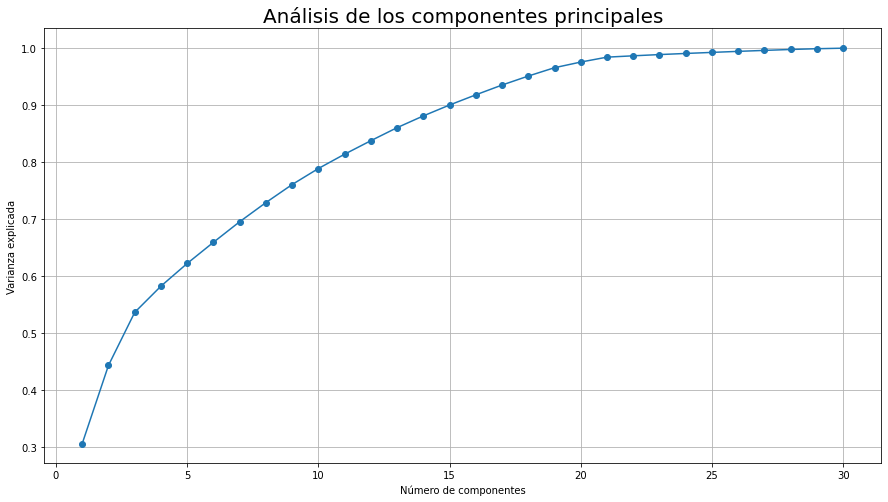

In [63]:
plt.figure(figsize=(15, 8))
plt.plot(range(1,31), varianza_acumulada, marker = 'o')
plt.title("Análisis de los componentes principales", fontsize=20)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.grid()
plt.show()

Podemos observar que la varianza explicada deja de crecer en el componente 27, y que en el componente 20 tenemos aproximadamente un 98% de la varianza explicada, el cual es un valor excelente ya que casi no estamos perdiendo información y habremos reducido en 10 el numero de variables de entrada de nuestro conjunto de datos, por lo cual, consideraremos este número de componentes como el más óptimo al ejecutar esta vez de forma definitiva la técnica del PCA.

In [64]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [65]:
print("N° de variables en el conjunto de entrenamiento: %i" % X_train_pca.shape[1])
print("N° de variables en el conjunto de evaluación: %i" % X_test_pca.shape[1])

N° de variables en el conjunto de entrenamiento: 20
N° de variables en el conjunto de evaluación: 20


Con este último paso realizado, podemos observar que nuestros conjuntos de datos pasaron de tener 30 variables a tener 20, lo cual indica que la técnica se ejecuto correctamente y que estamos listos para la contrucción y evaluación de nuestro modelo predictivo.

---

## 7. Construcción y evaluación del modelo predictivo

Para este proyecto utilizaremos el algoritmo del aumento del gradiente (Gradient Boosting), especificamente en una de sus versiones potenciadas y optimizadas, XGBoost.

El principal motivo por el que usaremos este tipo de algoritmo, es debido a que en la mayoría de ocaciones, si se le suministra una correcta combinación de hiperparámetros, obtiene mejores resultados al momento de predecir a comparación de sus predecesores, los árboles de decisión y los bosques aleatorios, y porque esta familia de algoritmos generalmente se ajustan muy bien a este tipo de problemas, en donde la predicción de clases solo depende de la interacción entre variables.

Resumiendo el funcionamiento de los algoritmos de Gradient Boosting tenemos:
* Se entrena un primer árbol de decisión en base a nuestro conjunto de entrenamiento
* Se predice el valor de nuestra variable de salida, se compara la predicción con el resultado real y se calcula el error cometido
* Posterior a ello, se entrena un segundo árbol de decisión para tratar de corregir y reducir el error cometido por el primer árbol
* Se vuelve a predecir el valor de nuestra variable de salida y se calcula nuevamente el error cometido
* Se entrena un tercer árbol para tratar de corregir y reducir el error cometido de manera conjunta por el primer y segundo árbol
* Se predice otra vez el valor de nuestra variable de salida y se calcula el error cometido

Este proceso se realiza iterativamente hasta llegar a un punto en donde no se pueda reducir más el error cometido y se da por válido el modelo. Este modelo predecirá nuevos datos en base al promedio de todas las predicciones de los árboles de decisión con el que ha sido entrenado, dando más peso a aquellos árboles con poco margen de error cometido.

Una vez hecha un pequeña introducción sobre los algoritmos de Gradient Boosting procederemos a realizar la construcción y evalución de nuestro modelo

### Elección de hiperparámetros

XGBoost depende mucho de la combinación de hiperparámetros que se le suministren para tener una precisión y eficacia superior a la de otros modelos, es por ello que utilizaremos un framework muy popular llamado Optuna para entrenar distintos modelos con distintas combinaciones de hiperparámetros, con el fin de elegir la combinación que un mayor valor AUC nos arroje

El motivo por el que utilizaremos AUC como métrica es debido a que en principio tenemos un conjunto de datos desbalanceados, y pese a que los rebalanceamos en la sección anterior utilizando SMOTE-NC, los nuevos datos que obtuvimos son solo una estimación de lo que podemos encontrar en la realidad, mas no datos reales, es por ello que se optó por preferir una métrica que evalúe cuanto es capaz el modelo de distinguir las distintas clases que tenemos en nuestra variable de salida, con el fin de obtener un balance, tanto en la predicción de clases positivas como negativas.

Dado que hemos realizado transformaciones en nuestros datos, aplicaremos la función de búsqueda de hiperparámetros a cada uno de los conjuntos obtenidos por este proceso, y obtendremos el mejor valor de métrica resultante de ellos, con el fin de comparar hasta que paso de la transformación de datos es necesaria para obtener el modelo con el mejor rendimiento posible, o si para este caso, no es necesario aplicar transformacion alguna. Es por ello que dividiremos esta seccion en tres partes:
* Hiperparámetros para datos rebalanceados por XGBoost
* Hiperparámetros para datos rebalanceados por SMOTE-NC
* Hiperparámetros para datos rebalanceados y con PCA

### * Hiperparámetros para datos rebalanceados por XGBoost

XGBoost tiene un parámetro muy útil que lidia con el desbalanceo de clases, el cual es "scale_pos_weight", este hiperparámetro escala el gradiente hacia la clase minoritaria (positiva), lo cual produce que el modelo en la fase de entrenamiento escale mucho más los errores cometidos hacia esta clase, y por ende, tienda a enfocarse muchos más en corregirlos. Su valor comúnmente se calcula del resultado de la siguiente ecuación: (N° de muestras de la clase mayoritaria / N° de muestras de la clase minoritaria)

In [66]:
def objective(trial):   

    # Hiperparámetros y el rango de su valor a probar
    params = {"n_estimators": trial.suggest_int("n_estimators",200,1200,50),
              "max_depth": trial.suggest_int("max_depth", 12, 25, 1),
              "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.5),
              "subsample": trial.suggest_discrete_uniform("subsample", 0.1, 1, 0.1),
              "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.3, 1,0.1),
              "scale_pos_weight": 2.76,
              "tree_method": "gpu_hist", 
              "eval_metric": "auc",
              "objective": "binary:logistic",
              "use_label_encoder": "False"}
    
    # Inicialización y entrenamiento del modelo
    model = XGBClassifier(**params)   
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    # Evaluación y obtención de métricas
    preds = model.predict(X_test)
    metric = accuracy_score(y_test, preds)
    
    return metric

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=70)

In [ ]:
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))
best_1 = study.trials_dataframe()

Se ejecutó la función tres veces de forma independiente, y posterior a ello, se registró la mejor combinación de parámetros que arrojo cada ejecución, siendo estas las siguientes:

* 79.22% | n_estimators=300, max_depth=18, learning_rate=0.0116, subsample=0.2, colsample_bytree=0.8 
* 79.17% | n_estimators=300, max_depth=16, learning_rate=0.0137, subsample=0.1, colsample_bytree=0.8 
* 79.03% | n_estimators=400, max_depth=18, learning_rate=0.0013, subsample=0.2, colsample_bytree=0.9 


Procederemos a entrenar un nuevo modelo XGBoost en base a las tres combinaciones de hiperparámetros obtenidas para determinar cual de ellas presenta mejores resultados al clasificar nuestros datos

#### Para la primera combinación

In [67]:
xgb_1a = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", eval_metric="auc", use_label_encoder=False,
                       n_estimators=300, max_depth=18, learning_rate=0.0116, subsample=0.2, colsample_bytree=0.8,
                       scale_pos_weight=2.76, seed=21)

xgb_1a.fit(X_train, y_train)
y_pred_1a = xgb_1a.predict(X_test)

#### Para la segunda combinación

In [68]:
xgb_1b = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", eval_metric="auc", use_label_encoder=False,
                       n_estimators=300, max_depth=16, learning_rate=0.0137, subsample=0.1, colsample_bytree=0.8,
                       scale_pos_weight=2.76, seed=21)

xgb_1b.fit(X_train, y_train)
y_pred_1b = xgb_1b.predict(X_test)

#### Para la tercera combinación

In [69]:
xgb_1c = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", eval_metric= "auc", use_label_encoder=False,
                       n_estimators=400, max_depth=18, learning_rate=0.0013, subsample=0.2, colsample_bytree=0.9,
                       scale_pos_weight=2.76, seed=21)

xgb_1c.fit(X_train, y_train)
y_pred_1c = xgb_1c.predict(X_test)

### Comparación de rendimiento entre combinaciones

#### Para la primera combinación

In [70]:
f1_1a = f1_score(y_test, y_pred_1a)
acc_1a = accuracy_score(y_test, y_pred_1a)
auc_1a = roc_auc_score(y_test, y_pred_1a)
report_1a = classification_report(y_test,y_pred_1a)

#### Para la segunda combinación

In [71]:
f1_1b = f1_score(y_test, y_pred_1b)
acc_1b = accuracy_score(y_test, y_pred_1b)
auc_1b = roc_auc_score(y_test, y_pred_1b)
report_1b = classification_report(y_test,y_pred_1b)

#### Para la tercera combinación

In [72]:
f1_1c = f1_score(y_test, y_pred_1c)
acc_1c = accuracy_score(y_test, y_pred_1c)
auc_1c = roc_auc_score(y_test, y_pred_1c)
report_1c = classification_report(y_test,y_pred_1c)

A continuación visualizaremos el puntaje de la métrica F1 y la precisión para cada combinación, a la vez que tambien observaremos un reporte de las principales métricas para evaluar la capacidad de clasificación de nuestros modelos

In [73]:
print("F1 primera comb.: %.2f%%" % (f1_1a * 100.0))
print("Accuracy primera comb.: %.2f%%" % (acc_1a * 100.0))
print("-------------------------------")
print("F1 segunda comb.: %.2f%%" % (f1_1b * 100.0))
print("Accuracy segunda comb.: %.2f%%" % (acc_1b * 100.0))
print("-------------------------------")
print("F1 tercera comb.: %.2f%%" % (f1_1c * 100.0))
print("Accuracy tercera comb.: %.2f%%" % (acc_1c * 100.0))

F1 primera comb.: 60.61%
Accuracy primera comb.: 77.85%
-------------------------------
F1 segunda comb.: 61.42%
Accuracy segunda comb.: 78.42%
-------------------------------
F1 tercera comb.: 62.00%
Accuracy tercera comb.: 78.42%


In [74]:
print(report_1a)
print("-------------------------------------------------")
print(report_1b)
print("-------------------------------------------------")
print(report_1c)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1552
           1       0.57      0.64      0.61       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.78      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1552
           1       0.58      0.65      0.61       561

    accuracy                           0.78      2113
   macro avg       0.73      0.74      0.73      2113
weighted avg       0.79      0.78      0.79      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1552
           1       0.58      0.66      0.62       561

    accuracy                           0.78      2113
   macro avg       0.73     

Observamos en un principio que la primera combinación tiene puntajes menores en comparación con la segunda y tercera combianción, los cuales tienen puntajes muy similares

Procederemos a graficar la matriz de confusión y la curva ROC-AUC.

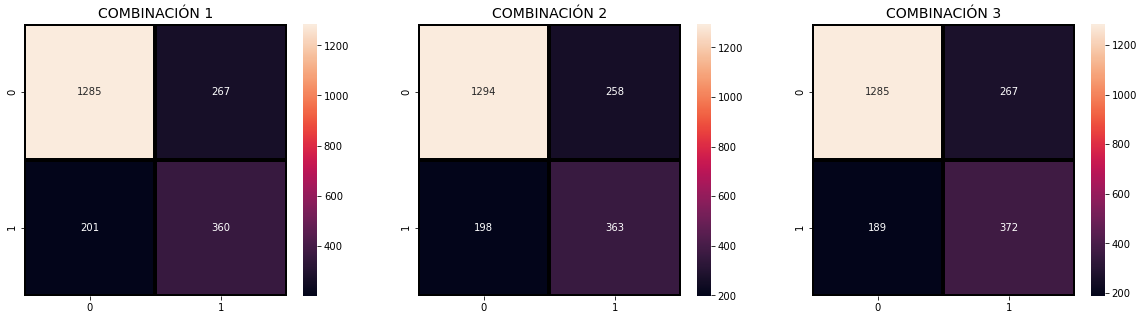

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_1a), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[0])
ax[0].set_title("COMBINACIÓN 1",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_1b), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[1])
ax[1].set_title("COMBINACIÓN 2",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_1c), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[2])
ax[2].set_title("COMBINACIÓN 3",fontsize=14)

plt.show()

De las matrices de confusión observamos que la combinación 3 tiene ligeramente un mejor balance entre verdaderos positivos y falsos positivos en comparación con las demás combinaciones, identificando de forma correcta más clientes desertores.

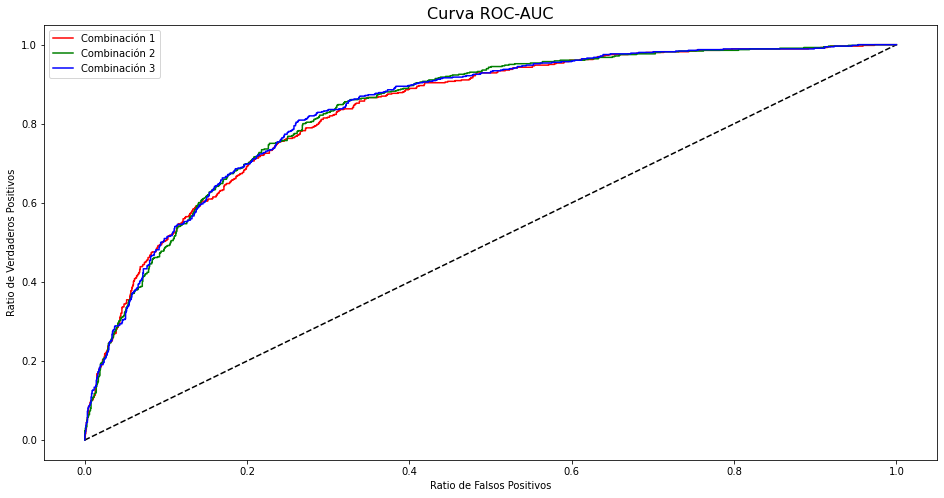

In [76]:
y_pred_prob1a = xgb_1a.predict_proba(X_test)[:,1]
fpr_1a, tpr_1a, thresholds_1a = roc_curve(y_test, y_pred_prob1a)
y_pred_prob1b = xgb_1b.predict_proba(X_test)[:,1]
fpr_1b, tpr_1b, thresholds_1b = roc_curve(y_test, y_pred_prob1b)
y_pred_prob1c = xgb_1c.predict_proba(X_test)[:,1]
fpr_1c, tpr_1c, thresholds_1c = roc_curve(y_test, y_pred_prob1c)

plt.figure(figsize=(16, 8))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_1a, tpr_1a, label='Combinación 1',color = "r")
plt.plot(fpr_1b, tpr_1b, label='Combinación 2',color = "g")
plt.plot(fpr_1c, tpr_1c, label='Combinación 3',color = "b")
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('Curva ROC-AUC',fontsize=16)
plt.legend()
plt.show()

En el gráfico de la curva podemos apreciar que la combinación 1 es la que menor AUC tiene, sin embargo, no es posible distinguir con claridad si la combinación 2 o 3 es la que mejor AUC tiene, asi que procederemos a mostrar su valor en forma de porcentaje

In [77]:
print("AUC primera comb.: %.2f%%" % (auc_1a * 100.0))
print("AUC segunda comb.: %.2f%%" % (auc_1b * 100.0))
print("AUC tercera comb.: %.2f%%" % (auc_1c * 100.0))

AUC primera comb.: 73.48%
AUC segunda comb.: 74.04%
AUC tercera comb.: 74.55%


Con este último paso realizado, observamos que la combinación 3 tiene ligeramente un mayor valor tanto de AUC como de puntaje F1 y precisión en comparación con las demás combinaciones, además que el total de verdaderos positivos y falsos positivos está mejor balanceado en su matriz de confusión, por lo tanto, utilizaremos este modelo como referente del conjunto de "Hiperparámetros para datos rebalanceados por XGBoot".

### * Hiperparámetros para datos rebalanceados por SMOTE-NC

In [78]:
def objective(trial):   
    
    # Hiperparámetros y el rango de su valor a probar
    params = {"n_estimators": trial.suggest_int("n_estimators",200,1200,50),
              "max_depth": trial.suggest_int("max_depth", 10, 25, 1),
              "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.5),
              "subsample": trial.suggest_discrete_uniform("subsample", 0.3, 1, 0.1),
              "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.3, 1,0.1),
              "tree_method": "gpu_hist", 
              "eval_metric": "auc",
              "objective": "binary:logistic",
              "use_label_encoder": "False"}
    
    # Inicialización y entrenamiento del modelo
    model = XGBClassifier(**params)   
    model.fit(X_train_bal,y_train_bal,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    # Evaluación y obtención de métricas
    preds = model.predict(X_test)
    metric = accuracy_score(y_test, preds)
    
    return metric

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=70)

In [ ]:
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))
best_2 = study.trials_dataframe()

Las mejores combinaciones de parámetros que arrojó la función en tres ejecuciones

* 78.89% | n_estimators=700, max_depth=17, learning_rate=0.0113, subsample=0.8, colsample_bytree=0.8  
* 78.65% | n_estimators=450, max_depth=15, learning_rate=0.0021, subsample=0.6, colsample_bytree=0.8   
* 78.56% | n_estimators=450, max_depth=14, learning_rate=0.0026, subsample=0.8, colsample_bytree=0.6  

Procederemos a entrenar un nuevo modelo XGBoost en base a las tres combinaciones de hiperparámetros obtenidas para determinar cual de ellas presenta mejores resultados al clasificar nuestros datos

#### Para la primera combianción

In [79]:
xgb_2a = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", use_label_encoder=False, eval_metric="auc",
                       n_estimators=700, max_depth=17, learning_rate=0.0113, subsample=0.8, colsample_bytree=0.8, seed=21)

xgb_2a.fit(X_train_bal, y_train_bal)
y_pred_2a = xgb_2a.predict(X_test)

#### Para la segunda combinación

In [80]:
xgb_2b = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", use_label_encoder=False, eval_metric="auc",
                       n_estimators=450, max_depth=15, learning_rate=0.0021, subsample=0.6, colsample_bytree=0.8, seed=21)

xgb_2b.fit(X_train_bal, y_train_bal)
y_pred_2b = xgb_2b.predict(X_test)

#### Para la tercera combinación

In [81]:
xgb_2c = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", use_label_encoder=False, eval_metric="auc",
                       n_estimators=450, max_depth=14, learning_rate=0.0026, subsample=0.8, colsample_bytree=0.6, seed=21)

xgb_2c.fit(X_train_bal, y_train_bal)
y_pred_2c = xgb_2c.predict(X_test)

### Comparación de rendimiento entre combinaciones

#### Para la primera combinación

In [82]:
f1_2a = f1_score(y_test, y_pred_2a)
acc_2a = accuracy_score(y_test, y_pred_2a)
auc_2a = roc_auc_score(y_test, y_pred_2a)
report_2a = classification_report(y_test,y_pred_2a)

#### Para la segunda combinación

In [83]:
f1_2b = f1_score(y_test, y_pred_2b)
acc_2b = accuracy_score(y_test, y_pred_2b)
auc_2b = roc_auc_score(y_test, y_pred_2b)
report_2b = classification_report(y_test,y_pred_2b)

#### Para la tercera combinación

In [84]:
f1_2c = f1_score(y_test, y_pred_2c)
acc_2c = accuracy_score(y_test, y_pred_2c)
auc_2c = roc_auc_score(y_test, y_pred_2c)
report_2c = classification_report(y_test,y_pred_2c)

In [85]:
print("F1 primera comb.: %.2f%%" % (f1_2a * 100.0))
print("Accuracy primera comb.: %.2f%%" % (acc_2a * 100.0))
print("-------------------------------")
print("F1 segunda comb.: %.2f%%" % (f1_2b * 100.0))
print("Accuracy segunda comb.: %.2f%%" % (acc_2b * 100.0))
print("-------------------------------")
print("F1 tercera comb.: %.2f%%" % (f1_2c * 100.0))
print("Accuracy tercera comb.: %.2f%%" % (acc_2c * 100.0))

F1 primera comb.: 56.00%
Accuracy primera comb.: 77.09%
-------------------------------
F1 segunda comb.: 60.49%
Accuracy segunda comb.: 78.61%
-------------------------------
F1 tercera comb.: 60.72%
Accuracy tercera comb.: 78.32%


In [86]:
print(report_2a)
print("-------------------------------------------------")
print(report_2b)
print("-------------------------------------------------")
print(report_2c)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1552
           1       0.57      0.55      0.56       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1552
           1       0.59      0.62      0.60       561

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.63      0.61       561

    accuracy                           0.78      2113
   macro avg       0.72     

Observamos que la combianción 1 tiene un rendimiento por debajo de las demás combinaciones, y que tanto la combinación 2 y 3 tienen puntajes muy similares

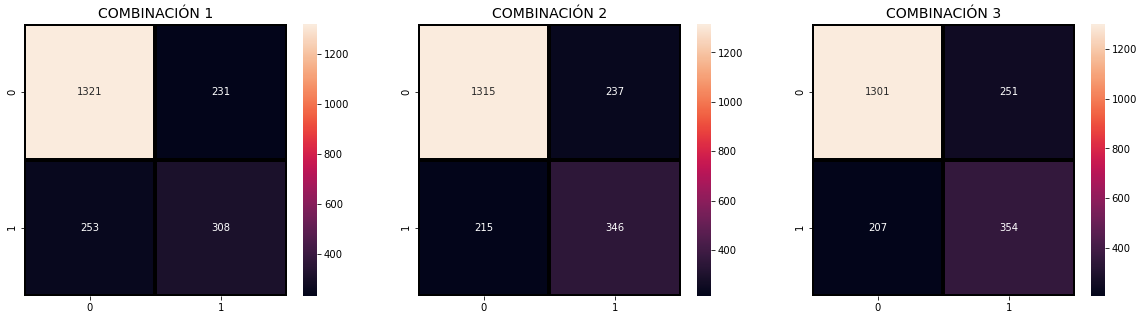

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_2a), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[0])
ax[0].set_title("COMBINACIÓN 1",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_2b), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[1])
ax[1].set_title("COMBINACIÓN 2",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_2c), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[2])
ax[2].set_title("COMBINACIÓN 3",fontsize=14)

plt.show()

De las matrices de confusión observamos que efectivamente que el modelo con la combinación 1 tiene un rendimiento inferior respecto a las demás, y que la combinación 3 parece ser la que mejor balance tiene en cuanto a verdaderos positivos y falsos positivos

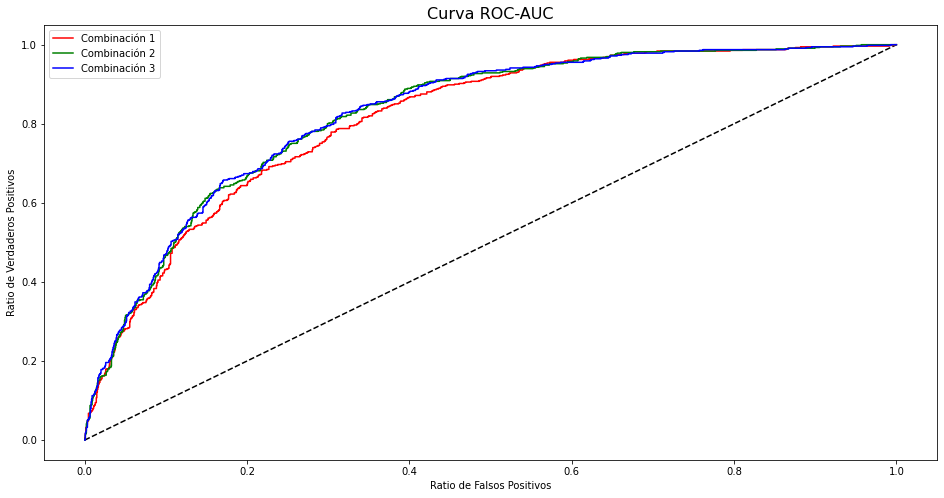

In [88]:
y_pred_prob2a = xgb_2a.predict_proba(X_test)[:,1]
fpr_2a, tpr_2a, thresholds_2a = roc_curve(y_test, y_pred_prob2a)
y_pred_prob2b = xgb_2b.predict_proba(X_test)[:,1]
fpr_2b, tpr_2b, thresholds_2b = roc_curve(y_test, y_pred_prob2b)
y_pred_prob2c = xgb_2c.predict_proba(X_test)[:,1]
fpr_2c, tpr_2c, thresholds_2c = roc_curve(y_test, y_pred_prob2c)

plt.figure(figsize=(16, 8))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_2a, tpr_2a, label='Combinación 1',color = "r")
plt.plot(fpr_2b, tpr_2b, label='Combinación 2',color = "g")
plt.plot(fpr_2c, tpr_2c, label='Combinación 3',color = "b")
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('Curva ROC-AUC',fontsize=16)
plt.legend()
plt.show()

En el gráfico de la curva se deja en clara evidencia la deficiencia de la combinación 1, y que la combinación 2 y 3 tienen curvas muy similares

In [89]:
print("AUC primera comb.: %.2f%%" % (auc_2a * 100.0))
print("AUC segunda comb.: %.2f%%" % (auc_2b * 100.0))
print("AUC tercera comb.: %.2f%%" % (auc_2c * 100.0))

AUC primera comb.: 70.01%
AUC segunda comb.: 73.20%
AUC tercera comb.: 73.46%


Y con este último paso realizado podemos decir que si bien las combinaciones 2 y 3 tienen valores de métrica muy parecidos, se observa en la matriz de confusión que el modelo de la combinación 3 generaliza mejor las clases que las demás combinaciones, por lo tanto, utilizaremos este modelo como referente del conjunto de "Hiperparámetros para datos rebalanceados por SMOTE-NC".

### * Hiperparámetros para datos rebalanceados y con PCA

In [90]:
def objective(trial):   
    
    # Hiperparámetros y el rango de su valor a probar
    params = {"n_estimators": trial.suggest_int("n_estimators",200,1200,50),
              "max_depth": trial.suggest_int("max_depth", 10, 25, 1),
              "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.5),
              "subsample": trial.suggest_discrete_uniform("subsample", 0.3, 1, 0.1),
              "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.3, 1,0.1),
              "tree_method": "gpu_hist", 
              "eval_metric": "auc",
              "objective": "binary:logistic",
              "use_label_encoder": "False"}
    
    # Inicialización y entrenamiento del modelo
    model = XGBClassifier(**params)      
    model.fit(X_train_pca,y_train_bal,eval_set=[(X_test_pca,y_test)],early_stopping_rounds=100,verbose=False)
    
    # Evaluación y obtención de métricas
    preds = model.predict(X_test_pca)    
    metric = accuracy_score(y_test, preds)
    
    return metric

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=70)

In [ ]:
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))
best_3 = study.trials_dataframe()

Se ejecutó la función tres veces de forma independiente, y posterior a ello, se registró la mejor combinación de parámetros que arrojo cada ejecución, siendo estas las siguientes:

* 77.78% | n_estimators=1200, max_depth=22, learning_rate=0.001, subsample=0.5, colsample_bytree=0.3    
* 77.71% | n_estimators=1000, max_depth=15, learning_rate=0.0033, subsample=0.4, colsample_bytree=0.4   
* 77.71% | n_estimators=800, max_depth=25, learning_rate=0.091, subsample=0.4, colsample_bytree=0.7   


Procederemos a entrenar un nuevo modelo XGBoost en base a las tres combinaciones de hiperparámetros obtenidas para determinar cual de ellas presenta mejores resultados al clasificar nuestros datos

#### Para la primera combinación

In [91]:
xgb_3a = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", use_label_encoder=False, eval_metric="auc",
                       n_estimators=1200, max_depth=22, learning_rate=0.001, subsample=0.5, colsample_bytree=0.3, seed=21)

xgb_3a.fit(X_train_pca, y_train_bal)
y_pred_3a = xgb_3a.predict(X_test_pca)

#### Para la segunda combinación

In [92]:
xgb_3b = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", use_label_encoder=False, eval_metric="auc",
                       n_estimators=1000, max_depth=15, learning_rate=0.0033, subsample=0.4, colsample_bytree=0.4, seed=21)

xgb_3b.fit(X_train_pca, y_train_bal)
y_pred_3b = xgb_3b.predict(X_test_pca)

#### Para la tercera combinación

In [93]:
xgb_3c = XGBClassifier(tree_method='gpu_hist', objective="binary:logistic", use_label_encoder=False, eval_metric="auc",
                       n_estimators=800, max_depth=25, learning_rate=0.091, subsample=0.4, colsample_bytree=0.7, seed=21)

xgb_3c.fit(X_train_pca, y_train_bal)
y_pred_3c = xgb_3c.predict(X_test_pca)

### Comparación de rendimiento entre combinaciones

#### Para la primera combinación

In [94]:
f1_3a = f1_score(y_test, y_pred_3a)
acc_3a = accuracy_score(y_test, y_pred_3a)
auc_3a = roc_auc_score(y_test, y_pred_3a)
report_3a = classification_report(y_test,y_pred_3a)

#### Para la segunda combinación

In [95]:
f1_3b = f1_score(y_test, y_pred_3b)
acc_3b = accuracy_score(y_test, y_pred_3b)
auc_3b = roc_auc_score(y_test, y_pred_3b)
report_3b = classification_report(y_test,y_pred_3b)

#### Para la tercera combinación

In [96]:
f1_3c = f1_score(y_test, y_pred_3c)
acc_3c = accuracy_score(y_test, y_pred_3c)
auc_3c = roc_auc_score(y_test, y_pred_3c)
report_3c = classification_report(y_test,y_pred_3c)

In [97]:
print("F1 primera comb.: %.2f%%" % (f1_3a * 100.0))
print("Accuracy primera comb.: %.2f%%" % (acc_3a * 100.0))
print("-------------------------------")
print("F1 segunda comb.: %.2f%%" % (f1_3b * 100.0))
print("Accuracy segunda comb.: %.2f%%" % (acc_3b * 100.0))
print("-------------------------------")
print("F1 tercera comb.: %.2f%%" % (f1_3c * 100.0))
print("Accuracy tercera comb.: %.2f%%" % (acc_3c * 100.0))

F1 primera comb.: 57.04%
Accuracy primera comb.: 77.76%
-------------------------------
F1 segunda comb.: 57.47%
Accuracy segunda comb.: 77.38%
-------------------------------
F1 tercera comb.: 54.86%
Accuracy tercera comb.: 75.63%


In [98]:
print(report_3a)
print("-------------------------------------------------")
print(report_3b)
print("-------------------------------------------------")
print(report_3c)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1552
           1       0.59      0.56      0.57       561

    accuracy                           0.78      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.77      0.78      0.78      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1552
           1       0.57      0.58      0.57       561

    accuracy                           0.77      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.77      0.77      0.77      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1552
           1       0.54      0.56      0.55       561

    accuracy                           0.76      2113
   macro avg       0.69     

Observamos que la combianción 3 tiene un rendimiento muy por debajo de las demás combinaciones, y que tanto la combinación 2 y 3 tienen puntajes muy similares

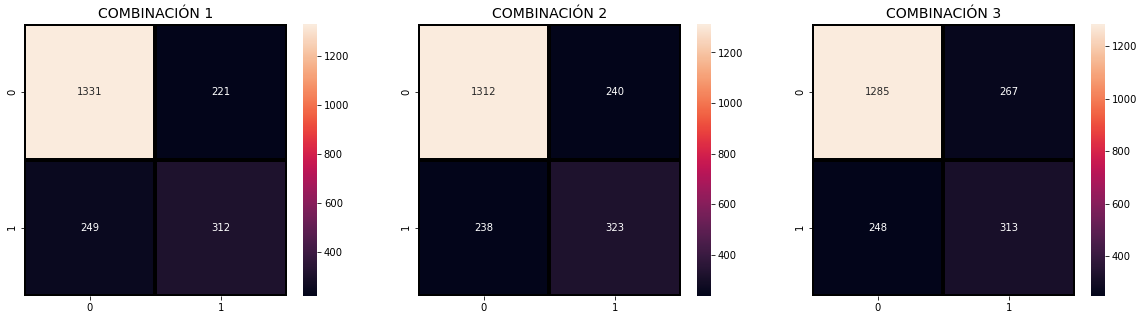

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_3a), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[0])
ax[0].set_title("COMBINACIÓN 1",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_3b), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[1])
ax[1].set_title("COMBINACIÓN 2",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_3c), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[2])
ax[2].set_title("COMBINACIÓN 3",fontsize=14)

plt.show()

De las matrices de confusión observamos que la combinación 3 tiene un rendimiento muy malo al predecir muestras de la clase minoritaria, y que la combinación 2 tiene ligeramente mejor balance en cuanto a reconocer verdaderos positivos y falsos positivos en comparación con las combinación 1

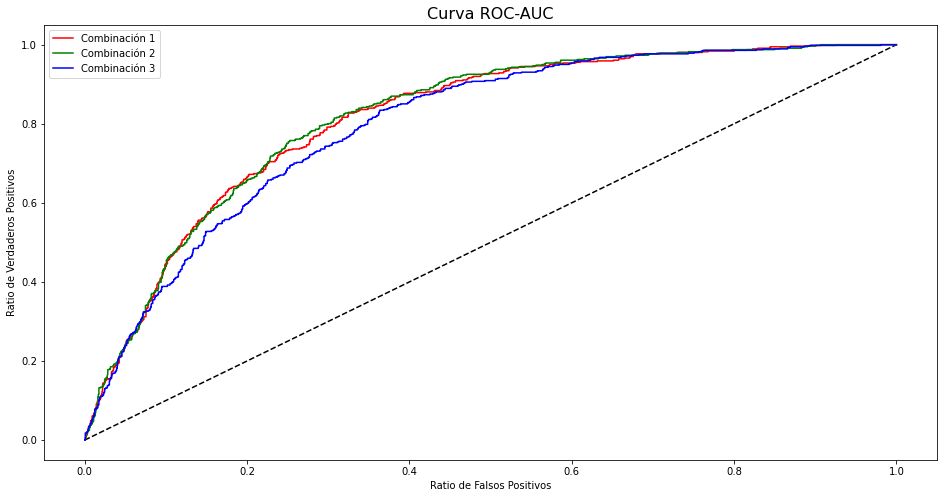

In [100]:
y_pred_prob3a = xgb_3a.predict_proba(X_test_pca)[:,1]
fpr_3a, tpr_3a, thresholds_3a = roc_curve(y_test, y_pred_prob3a)
y_pred_prob3b = xgb_3b.predict_proba(X_test_pca)[:,1]
fpr_3b, tpr_3b, thresholds_3b = roc_curve(y_test, y_pred_prob3b)
y_pred_prob3c = xgb_3c.predict_proba(X_test_pca)[:,1]
fpr_3c, tpr_3c, thresholds_3c = roc_curve(y_test, y_pred_prob3c)

plt.figure(figsize=(16, 8))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_3a, tpr_3a, label='Combinación 1',color = "r")
plt.plot(fpr_3b, tpr_3b, label='Combinación 2',color = "g")
plt.plot(fpr_3c, tpr_3c, label='Combinación 3',color = "b")
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('Curva ROC-AUC',fontsize=16)
plt.legend()
plt.show()

Con el gráfico de la curva podemos descartar la combinación 3, para solo quedarnos con la evaluación de las combinaciones 1 y 2

In [101]:
print("AUC primera comb.: %.2f%%" % (auc_2a * 100.0))
print("AUC segunda comb.: %.2f%%" % (auc_2b * 100.0))
print("AUC tercera comb.: %.2f%%" % (auc_2c * 100.0))

AUC primera comb.: 70.01%
AUC segunda comb.: 73.20%
AUC tercera comb.: 73.46%


Y con este último paso realizado podemos decir que si bien las combinaciones 1 y 2 tienen valores de métrica muy parecidos, elegir cualquiera de estos modelos sería una buena decisión, asi que en este caso nos quedaremos con la combinación 2, la cual dió ligeramente mejores resultados en la matriz de confusión al tener un mayor número de predicciones correctas en la clase minoritaria, por lo tanto, utilizaremos este modelo como referente del conjunto de "Hiperparámetros para datos rebalanceados y con PCA".

### Elección del mejor modelo

Después de haber elegido las tres mejores combinaciones en base al entrenamiento de conjuntos con diferentes tipos de transformación, procederemos a compararlos entre sí para quedarnos con un modelo definitivo el cual mejores resultados de evaluación tenga.

In [102]:
print("F1 Primer conjunto: %.2f%%" % (f1_1c * 100.0))
print("Accuracy Primer conjunto: %.2f%%" % (acc_1c * 100.0))
print("-------------------------------")
print("F1 Segundo conjunto: %.2f%%" % (f1_2c * 100.0))
print("Accuracy Segundo conjunto: %.2f%%" % (acc_2c * 100.0))
print("-------------------------------")
print("F1 Tercer conjunto: %.2f%%" % (f1_3b * 100.0))
print("Accuracy Tercer conjunto: %.2f%%" % (acc_3b * 100.0))

F1 Primer conjunto: 62.00%
Accuracy Primer conjunto: 78.42%
-------------------------------
F1 Segundo conjunto: 60.72%
Accuracy Segundo conjunto: 78.32%
-------------------------------
F1 Tercer conjunto: 57.47%
Accuracy Tercer conjunto: 77.38%


In [103]:
print(report_1c)
print("-------------------------------------------------")
print(report_2c)
print("-------------------------------------------------")
print(report_3b)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1552
           1       0.58      0.66      0.62       561

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.73      2113
weighted avg       0.79      0.78      0.79      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.63      0.61       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.79      2113

-------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1552
           1       0.57      0.58      0.57       561

    accuracy                           0.77      2113
   macro avg       0.71     

De principio estamos observando que el modelo del primer conjunto (Datos rebalanceados por XGBoost) tiene un rendimiento superior en cuanto a puntaje F1 se refiere, y en cuanto a precisión tiene un puntaje similar con el modelo de la combinacion 2 (Datos rebalanceados por SMOTE-NC)

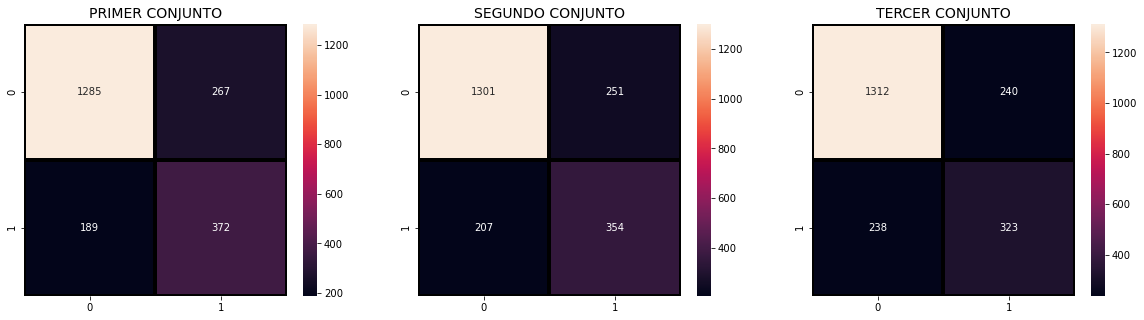

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_1c), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[0])
ax[0].set_title("PRIMER CONJUNTO",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_2c), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[1])
ax[1].set_title("SEGUNDO CONJUNTO",fontsize=14)

sns.heatmap(confusion_matrix(y_test, y_pred_3b), annot=True, fmt = "d", linecolor="k", linewidths=3, ax=ax[2])
ax[2].set_title("TERCER CONJUNTO",fontsize=14)

plt.show()

De nuestras matrices de confusión observamos que el modelo del primer conjunto tiene ligeramente una mayor sensibilidad en comparación con el del segundo conjunto, y que el modelo del tercer conjunto tiene un bajo rendimiento en la identificacion de verdaderos positivos

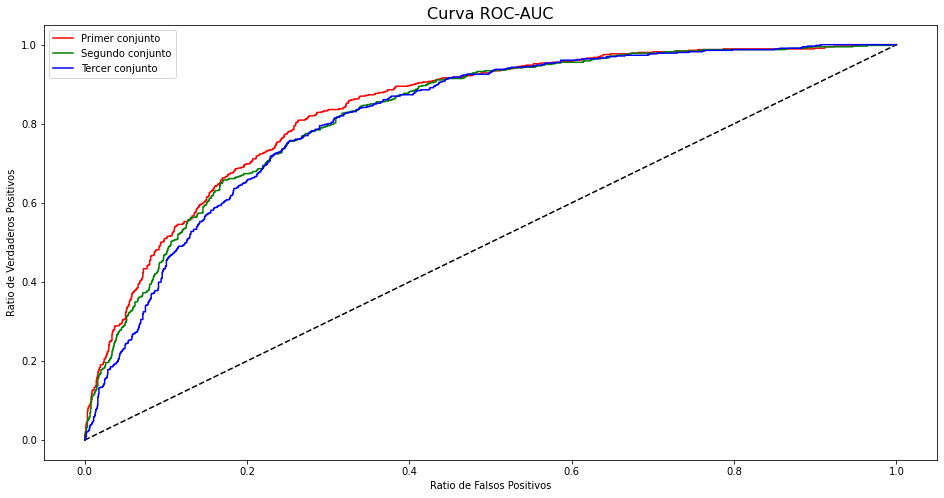

In [105]:
plt.figure(figsize=(16, 8))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_1c, tpr_1c, label='Primer conjunto',color = "r")
plt.plot(fpr_2c, tpr_2c, label='Segundo conjunto',color = "g")
plt.plot(fpr_3b, tpr_3b, label='Tercer conjunto',color = "b")
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('Curva ROC-AUC',fontsize=16)
plt.legend()
plt.show()

El gráfico de la curva ROC-AUC nos da un resultado muy interesante, ya que podemos ver la superioridad del modelo del primer conjunto en cuanto a la prediccion correcta de verdaderos positivos y falsos positivos en comparación con los demás modelos, por lo tanto, ya se puede deducir cual es la combinación de parámetros que mejor se ajustan a nuestros datos

In [106]:
print("AUC Primer conjunto: %.2f%%" % (auc_1c * 100.0))
print("AUC Segundo conjunto: %.2f%%" % (auc_2c * 100.0))
print("AUC Tercer conjunto: %.2f%%" % (auc_2b * 100.0))

AUC Primer conjunto: 74.55%
AUC Segundo conjunto: 73.46%
AUC Tercer conjunto: 73.20%


Finalmente, con estos puntajes calculados, llegamos a la decision de utilizar el mejor modelo proveniente del primer conjunto (Datos rebalanceados por XGBoost), debido a que a lo largo de todo el proceso de selección, mostró superioridad frente a los demás modelos.

Combinación de parámetros del modelo final:
* tree_method="gpu_hist", objective="binary:logistic", eval_metric="auc", use_label_encoder=False, n_estimators=400, max_depth=18, learning_rate=0.0013, subsample=0.2, colsample_bytree=0.9, seed=21

In [107]:
# Guardado del modelo
joblib.dump(xgb_1c, "XGboost_Model_Churn")

['XGboost_Model_Churn']

---

## 8. Conclusiones

* Los clientes que cuentan con servicio de conexión a internet, especialmente el de fibra óptica, pero no con sus servicios complementarios, como los que estan relacionados con la seguridad en línea, son muy propensos a desertar los servicios de la empresa. La causa por la cual estos clientes no adquieren los servicios complementarios al de internet podría estar vinculada al factor económico, es por ello que se podria sugerir a la empresa enfocar la mayor parte de sus esfuerzos en recopilar información acerca del causante de este problema y a raiz de ello, tomar las medidas necesarias.

* Los clientes que cuentan solamente con servicio de telefonía se sienten satisfechos con el servicio que les brinda la empresa, puesto que la gran mayoria de clientes que permanecieron en la empresa en el tercer trimestre pertenecen a este conjunto.

* Se prefirió utilizar métricas basadas en el rendimiento de un modelo al clasificar datos desbalanceados, como vendrian a ser la sensibilidad, la precisión, el puntaje F1 y la curva ROC-AUC, puesto que nuestros datos sufren de este problema, y es más conveniente analizar y evaluar el rendimiento de nuestro modelo en base a las predicciones que haga en las muestras de nuestra clase minoritaria, que en este caso son los clientes desertores, ya que este es el problema principal de nuestro estudio y la razón por la que se decidió implementar algoritmos de aprendizaje automático para su detección.

* Se evidenció que la técnica de reducción de la dimensionalidad PCA afectó en la correcta predicción de nuestro modelo XGBoost, esto debido a que los algoritmos basados en árboles de decisión no necesitan reducción de dimension previamente a su entrenamiento, puesto que estos de forma natural seleccionan las variables que más aportan en la predicción del modelo, dando poca prioridad a aquellas no aportan mucho.

* Los modelos con mejores resultados fueron los que tuvieron un número regular de árboles pero una profundidad relativamente alta, lo cual ocacionó que nuestro ratio de aprendizaje fuese mas bajo de lo común, esto en cierta medida es útil ya que evitará el sobreajuste al clasificar nuestros datos, pero por otra parte, nuestro modelo puede verse afectado en cuanto al tiempo de ejecución para realizar una determinada predicción, encontrandonos en una situación en la que debemos elegir si queremos priorizar el tiempo o la calidad, en este caso, siendo el objetivo de este proyecto la calidad, asumimos este modelo por válido.